In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('movies-data-exploration')
jovian.set_colab_id('1HRJFsF-Lo_Pm607h_HwqpSPOa-6bcF-P')

<a id='top'></a>
# Data understanding

## Table of Contents
1. [Dataset Description](#dataset) 
2. [Data Cleaning](#cleaning) 
3. [Exploratory Analysis](#ea)
4. [Motivation and Proposal](#mp)

<a id='dataset'></a>
## 1. Dataset description ([to top](#top))

**Dataset description from Kaggle :**

These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

**Content :**

This dataset consists of the following files:

**movies_metadata.csv**: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

**keywords.csv**: Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

**credits.csv**: Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

**links.csv**: The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

**links_small.csv**: Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.

**ratings_small.csv**: The subset of 100,000 ratings from 700 users on 9,000 movies.

The Full MovieLens Dataset consisting of 26 million ratings and 750,000 tag applications from 270,000 users on all the 45,000 movies in this dataset can be accessed here: *https://grouplens.org/datasets/movielens/latest/*

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%matplotlib inline
import re
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
import warnings
import math
warnings.filterwarnings("ignore")

### movies_metadata dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/BDA/input/movies_metadata.csv')
df.head().transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [5]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

**Features:**

* **adult**: Indicates if the movie is X-Rated or Adult.
* **belongs_to_collection**: A stringified dictionary that gives information on the movie series the particular film belongs to.
* **budget**: The budget of the movie in dollars.
* **genres**: A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage**: The Official Homepage of the movie.
* **id**: The ID of the movie.
* **imdb_id**: The IMDB ID of the movie.
* **original_language**: The language in which the movie was originally shot in.
* **original_title**: The original title of the movie.
* **overview**: A brief description of the movie.
* **popularity**: The Popularity Score assigned by TMDB.
* **poster_path**: The URL of the poster image.
* **production_companies**: A stringified list of production companies involved with the making of the movie.
* **production_countries**: A stringified list of countries where the movie was shot/produced in.
* **release_date**: Theatrical Release Date of the movie.
* **revenue**: The total revenue of the movie in dollars.
* **runtime**: The runtime of the movie in minutes.
* **spoken_languages**: A stringified list of spoken languages in the film.
* **status**: The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline**: The tagline of the movie.
* **title**: The Official Title of the movie.
* **video**: Indicates if there is a video present of the movie with TMDB.
* **vote_average**: The average rating of the movie.
* **vote_count**: The number of votes by users, as counted by TMDB.

In [6]:
df.shape

(45466, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

There are a total of **45,466 movies** with **24 features**. Most of the features have very few NaN values (apart from ***homepage*** and ***tagline***).



---



The other two related dateset: **credits** dataset and **keywords** dataset.

### credits dataset

In [8]:
credits_df = pd.read_csv('/content/drive/MyDrive/BDA/input/credits.csv')
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


**Features:**
* **cast:** A stringified list of dictionaries consisting of cast names and the corresponding characters they played.
* **crew:** A stringified list of dictionaries consisting of crew names and the function they performed.
* **id:** The TMDB ID of movie.

In [9]:
credits_df.shape

(45476, 3)

In [10]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


### keywords dataset

In [11]:
keywords_df = pd.read_csv('/content/drive/MyDrive/BDA/input/keywords.csv')
keywords_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [12]:
keywords_df.shape

(46419, 2)

In [13]:
keywords_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB




---



To handle the massive number of missing values and complement our TMDB voting system, we seek another movie dataset.

### IMDb movies dataset
IMDb movies extensive dataset

https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset

* The movies dataset includes 85,855 movies with attributes such as movie description, average rating, number of votes, genre, etc.

* The ratings dataset includes 85,855 rating details from demographic perspective.

* The names dataset includes 297,705 cast members with personal attributes such as birth details, death details, height, spouses, children, etc.

* The title principals dataset includes 835,513 cast members roles in movies with attributes such as IMDb title id, IMDb name id, order of importance in the movie, role, and characters played.

The IMDB extensive dataset serves as an excellent auxiliary dataset to fill in the missing values in the TMDB dataset since it includes a more significant number of movies. In addition, it also incorporates some attributes regarding the audience's rating.

In [14]:
imdb_movies_df = pd.read_csv('/content/drive/MyDrive/BDA/input/IMDb movies.csv')
imdb_movies_df.head().transpose()

,0,1,2,3,4
imdb_title_id,tt0000009,tt0000574,tt0001892,tt0002101,tt0002130
title,Miss Jerry,The Story of the Kelly Gang,Den sorte drøm,Cleopatra,L'Inferno
original_title,Miss Jerry,The Story of the Kelly Gang,Den sorte drøm,Cleopatra,L'Inferno
year,1894,1906,1911,1912,1911
date_published,1894-10-09,1906-12-26,1911-08-19,1912-11-13,1911-03-06
genre,Romance,"Biography, Crime, Drama",Drama,"Drama, History","Adventure, Drama, Fantasy"
duration,45,70,53,100,68
country,USA,Australia,"Germany, Denmark",USA,Italy
language,None,None,NaN,English,Italian
director,Alexander Black,Charles Tait,Urban Gad,Charles L. Gaskill,"Francesco Bertolini, Adolfo Padovan"


In [15]:
imdb_movies_df.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

We can see the related feature between IMDB and TMDB:
* '**imdb_title_id**' : title ID on IMDb, corresponding to the feature 'imdb_id' in TMDB.
* '**title**' : title name, corresponding to the feature 'title' in TMDB.
* '**original_title**' : original title name, corresponding to the feature 'original_title' in TMDB.
* '**year**' : year of release, related to the feature 'release_date' in TMDB.
* '**date_published**' : date of release, corresponding to the feature 'release_date' in TMDB.
* '**genre**' : movie genre, corresponding to the feature 'genres' in TMDB.
* '**duration**' : duration (in minutes), corresponding to the feature 'runtime' in TMDB.
* '**country**' : movie country, corresponding to the feature 'production_countries' in TMDB.
* '**language**' : movie language, corresponding to the feature 'spoken_languages' in TMDB.
* '**director**' : director name, related to the feature 'crew' in credits datset.
* '**writer**' : writer name
* '**production_company**' : production company, corresponding to the feature 'production_companies' in TMDB.
* '**actors**' : actor names, related to the feature 'cast' in credits datset.
* '**description**' : plot descrption, related to the feature 'overview' in credits datset.
* '**avg_vote**' : average vote
* '**votes**' : number of votes received
* '**budget**' : budget, corresponding to the feature 'budget' in TMDB.
* '**usa_gross_income**' : USA gross income
* '**worlwide_gross_income**' : worldwide gross income, corresponding to the feature 'revenue' in TMDB.
* '**metascore**' : metascore rating
* '**reviews_from_users**' : number of reviews from users
* '**reviews_from_critics**' : number of reviews from critics

In [16]:
df.shape, imdb_movies_df.shape

((45466, 24), (85855, 22))

In [17]:
imdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

Features *usa_gross_income* and *metascore* have only very few non-null values and are not related to the TMDB dataset, so we don't need them; *year* is included in *date_published*, therefore,  it is not helpful here; *reviews_from_users* and *reviews_from_critics* are highly related to *votes*, thus they are redundant as well.

Before joining the two datasets, we first drop the duplicated records.

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(45453, 24)

In [20]:
df = pd.merge(df, imdb_movies_df[imdb_movies_df.columns.difference(['usa_gross_income', 'metascore', 'year','reviews_from_users','reviews_from_critics'])], left_on="imdb_id", right_on="imdb_title_id", suffixes=('_tmdb', '_imdb'), how="left")

In [21]:
df.shape

(45453, 41)

After merging the imdb dataset, we can drop *imdb_id* and *imdb_title_id*.

In [22]:
df = df.drop(["imdb_id", "imdb_title_id"], axis=1)

<a id='cleaning'></a>
## 2. Data Cleaning ([to top](#top))
In this stage, we will address the missing values of the TMDB dataset by filling in with corresponding values from the IMDB dataset.

In [23]:
df.isnull().sum()

adult                        0
belongs_to_collection    40959
budget_tmdb                  0
genres                       0
homepage                 37673
id                           0
original_language           11
original_title_tmdb          0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25045
title_tmdb                   6
video                        6
vote_average                 6
vote_count                   6
actors                   11378
avg_vote                 11367
budget_imdb              31740
country                  11371
date_published           11367
description              11592
director                 11370
duration                 11367
genre                    11367
language

We can see an enormous number of missing values in the features *belongs_to_collection*, *homepage*, *tagline*, and *writer*, so let's first handle these missing values.

##### **belongs_to_collection:**


In [24]:
df['belongs_to_collection'].isnull().sum()

40959

Considering the significant number of missing values in *belongs_to_collection*,  instead of dropping the nulls, we turned this feature into a Boolean variable, with **1** indicating a movie belongs to a collection.  Before that, we keep all the non-null values in a new data frame for future exploration.

In [25]:
df_fran = df[df['belongs_to_collection'].notnull()]
df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if pd.isna(x) else 1)

##### **homepage:**


In [26]:
df['homepage'].isnull().sum()

37673

Considering the enormous number of missing values in the *homepage* feature, we converted this feature into a Boolean variable, which indicates if a movie has a homepage or not.

In [27]:
df['homepage'] = df['homepage'].apply(lambda x: 0 if pd.isna(x) else 1)

##### **tagline:**

In [28]:
df['tagline'].isnull().sum()

25045

In [29]:
df["tagline"] = df['tagline'].fillna('')

##### **writer:**

In [30]:
df['writer'].isnull().sum()

11550

Drop nan:

In [31]:
df.dropna(subset=['writer'], inplace=True)

In [32]:
df['writer'] =  df['writer'].astype(str).apply(lambda x: x.replace(", ",",").split(",")).tolist()

In [33]:
df['writer'].head(5)

0                  [John Lasseter, Pete Docter]
1             [Jonathan Hensleigh, Greg Taylor]
2    [Mark Steven Johnson, Mark Steven Johnson]
3              [Terry McMillan, Terry McMillan]
4            [Albert Hackett, Frances Goodrich]
Name: writer, dtype: object

In [34]:
df[df['writer'].str.len()==0]['writer']

Series([], Name: writer, dtype: object)

##### **overview:**

In [35]:
df[['overview','description']].isnull().sum()

overview       613
description    217
dtype: int64

In [36]:
df[['overview','description']].head()

,overview,description
0,"Led by Woody, Andy's toys live happily in his ...",A cowboy doll is profoundly threatened and jea...
1,When siblings Judy and Peter discover an encha...,When two kids find and play a magical board ga...
2,A family wedding reignites the ancient feud be...,John and Max resolve to save their beloved bai...
3,"Cheated on, mistreated and stepped on, the wom...","Based on Terry McMillan's novel, this film fol..."
4,Just when George Banks has recovered from his ...,George Banks must deal not only with the pregn...


Let's use the feature *description* from IMDB to fill in the missing values of the feature *overview* from TMDB, and then drop *description*. The remaining missing values in *overview* can be filled in with an empty string ''.

In [37]:
df["overview"] = df['overview'].fillna(df['description'])
df[df['overview'].isnull()].shape

(56, 39)

In [38]:
df = df.drop('description', axis=1)
df["overview"] = df['overview'].fillna('')

##### **budget:**

In [39]:
df["budget_imdb"].value_counts()

$ 5000000      371
$ 10000000     343
$ 2000000      336
$ 3000000      326
$ 1000000      323
              ... 
EUR 4100000      1
$ 1744000        1
AUD 8240000      1
PLN 7000000      1
$ 7573797        1
Name: budget_imdb, Length: 2787, dtype: int64

The values of *budget* in IMDB are formated as **a currency symbol + an Integer** (e.g., \$ 100, PLN 100 ),  and most of them are in dollars.

Whereas values of *budget* in TMDB  are integers, meaning dollars.  So we extract the *budget* value starting with \$ and discard the others from this perspective.

In [40]:
df["budget_imdb"].str.startswith('$',na = "NaN").value_counts()

NaN      20219
True     10940
False     2744
Name: budget_imdb, dtype: int64

In [41]:
# Function to clean the budget_imdb
# Search for budget_imdb that not start with '$', fill with pd.NA
def Clean_budget_imdb(budget_imdb):
    if re.search('\$ \d+', budget_imdb):
        return budget_imdb
  
    else:
        return pd.NA
          
# Updated the budget_imdb columns
df['budget_imdb'] = df['budget_imdb'].astype(str).apply(Clean_budget_imdb)

In [42]:
df.replace(df[df["budget_imdb"].str.startswith('^$')==True]["budget_imdb"], pd.NA, inplace=True)

In [43]:
df["budget_imdb"].str.startswith('$',na = "NaN").value_counts()

NaN     22963
True    10940
Name: budget_imdb, dtype: int64

Then, we remove the '$'.

In [44]:
df["budget_imdb"] = df["budget_imdb"].str.extract('(\d+)', expand=False)

Before handling the missing values in the *budget*, we transform the budget values into numeric values and convert 0 into NULLs, suggesting they are actually missing values.

In [45]:
df['budget_tmdb'] = pd.to_numeric(df['budget_tmdb'], errors='coerce')
df['budget_imdb'] = pd.to_numeric(df['budget_imdb'], errors='coerce')
df['budget_tmdb'] = df['budget_tmdb'].replace(0, np.nan)
df['budget_imdb'] = df['budget_imdb'].replace(0, np.nan)
df[df['budget_tmdb'].isnull()].shape

(25820, 38)

We got a huge number of missing values in budget_tmdb. 
 Let's use the budget values from IMDB to fill them in.

In [46]:
df["budget_tmdb"] = df['budget_tmdb'].fillna(df['budget_imdb'])
df[df['budget_tmdb'].isnull()].shape

(21543, 38)

After filling in the NULL value in *budget_tmdb*, we can drop *budget_imdb*,  as well as the rest missing values.

In [47]:
df = df.drop('budget_imdb', axis=1)
df.dropna(subset=['budget_tmdb'], inplace=True)

##### **revenue:**

In [48]:
df['revenue'].isnull().sum()

0

We noticed that *revenue* in TMDB does not have NULL values, but it could be **0** values.

In [49]:
df[df['revenue'] == 0].shape

(6710, 37)

We see that the majority of movies have a recorded revenue of **0**. This indicates that we do not have information about the total revenue for these movies. Let's convert the **0** values in revenue into NULLs and use the *worlwide_gross_income* values from IMDB to fill them in.

In [50]:
df['revenue'] = df['revenue'].replace(0, np.nan)

In [51]:
df[['revenue', 'worlwide_gross_income']].head()

,revenue,worlwide_gross_income
0,373554033.0,$ 404265438
1,262797249.0,$ 262821940
2,NaN,$ 71518503
3,81452156.0,$ 81452156
4,76578911.0,$ 76594107


We can cope with the feature *revenue*  and fill in the related missing values by following the same logic of the feature *budget*. 

In [52]:
df["worlwide_gross_income"].str.startswith('$',na = "NaN").value_counts()

True     8590
NaN      3765
False       5
Name: worlwide_gross_income, dtype: int64

In [53]:
# Function to clean the worlwide_gross_income
# Search for worlwide_gross_income that not start with '$', fill with pd.NA
def Clean_worlwide_gross_income(worlwide_gross_income):
    if re.search('\$ \d+', worlwide_gross_income):
        return worlwide_gross_income
  
    else:
        return pd.NA
          
# Updated the budget_imdb columns
df['worlwide_gross_income'] = df['worlwide_gross_income'].astype(str).apply(Clean_worlwide_gross_income)

In [54]:
df.replace(df[df["worlwide_gross_income"].str.startswith('^$')==True]["worlwide_gross_income"], pd.NA, inplace=True)

In [55]:
df["worlwide_gross_income"].str.startswith('$',na = "NaN").value_counts()

True    8590
NaN     3770
Name: worlwide_gross_income, dtype: int64

In [56]:
df["worlwide_gross_income"] = df["worlwide_gross_income"].str.extract('(\d+)', expand=False)

In [57]:
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['worlwide_gross_income'] = pd.to_numeric(df['worlwide_gross_income'], errors='coerce')
df['revenue'] = df['revenue'].replace(0, np.nan)
df['worlwide_gross_income'] = df['worlwide_gross_income'].replace(0, np.nan)

In [58]:
df["revenue"] = df['revenue'].fillna(df['worlwide_gross_income'])
df[df['revenue'].isnull()].shape

(3436, 37)

In [59]:
df = df.drop('worlwide_gross_income', axis=1)
df.dropna(subset=['revenue'], inplace=True)

##### **vote_average and avg_vote:**

In [60]:
df[['vote_average','avg_vote']].isnull().sum()

vote_average    0
avg_vote        0
dtype: int64

In [61]:
df[df['vote_average'] == 0].shape

(44, 36)

In [62]:
df[df['avg_vote'] == 0].shape

(0, 36)

Let's turn the **0** value into NULL, and then drop the NULL.

In [63]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)
df.dropna(subset=['vote_average','avg_vote'], inplace=True)

##### **vote_count and votes:**

In [64]:
df[['vote_count','votes']].isnull().sum()

vote_count    0
votes         0
dtype: int64

In [65]:
df[df['vote_count'] == 0].shape

(0, 36)

In [66]:
df[df['votes'] == 0].shape

(0, 36)

There are no missing values and **0** values in *vote_count*.

##### **popularity:**

In [67]:
df['popularity'].isnull().sum()

0

There are no missing values in *popularity*.

We convert the values into float numbers.

In [68]:
df['popularity'] = df['popularity'].astype('float')

##### **runtime:**

In [69]:
df[['runtime','duration']].isnull().sum()

runtime     3
duration    0
dtype: int64

In [70]:
df[df['runtime'] == 0].shape, df[df['duration'] == 0].shape

((53, 36), (0, 36))

Before exploiting the duration values to fill in the missing values in runtime, we need to transform the  **0** value of runtime into NULLs.

In [71]:
df['runtime'] = df['runtime'].replace(0, np.nan)

In [72]:
df[['runtime','duration']].isnull().sum()

runtime     56
duration     0
dtype: int64

In [73]:
df["runtime"] = df['runtime'].fillna(df['duration'])

In [74]:
df[['runtime','duration']].isnull().sum()

runtime     0
duration    0
dtype: int64

After all the missing values in *runtime* have been filled in, we can drop the *duration* feature.

In [75]:
df = df.drop('duration', axis=1)

##### **id:**

We convert the *id* feature into an integer value and use it as a key for joining the **credit dataset** and the **keyword dataset**.

In [76]:
df['id'].isnull().sum()

0

There are no missing values in *id*.

In [77]:
df['id'] = df['id'].astype('int')

##### **release_date:**


In [78]:
df[['release_date','date_published']].isnull().sum()

release_date      0
date_published    0
dtype: int64

There is no missing values in release_date, we can simply drop *data_published* feature.

In [79]:
df = df.drop('date_published', axis=1)

##### **original_title:**

In [80]:
df[['original_title_tmdb','original_title_imdb']].isnull().sum()

original_title_tmdb    0
original_title_imdb    0
dtype: int64

No need for the *original_title* from IMDB anymore, so we can safely drop it.

In [81]:
df = df.drop("original_title_imdb", axis=1)

In [82]:
df[df['original_title_tmdb'] != df['title_tmdb']][['title_tmdb', 'original_title_tmdb']].head()

,title_tmdb,original_title_tmdb
28,The City of Lost Children,La Cité des Enfants Perdus
57,The Postman,Il postino
79,The White Balloon,بادکنک سفید
81,Antonia's Line,Antonia
110,Rumble in the Bronx,紅番區


The *original title* refers to the movie's title in the native language in which the movie was shot. As such, I will prefer using the translated, Anglicized name in this analysis and hence, will drop the original titles altogether. We will be able to deduce if the movie is a foreign language film by looking at the **original_language** feature , so no tangible information is lost in doing so.

In [83]:
df = df.drop('original_title_tmdb', axis=1)

##### **adult:**

In [84]:
df['adult'].value_counts()

False    8880
Name: adult, dtype: int64

There are **0 adult movies** in this dataset. The *adult* feature therefore is useless to us and can be safely dropped.

In [85]:
df = df.drop('adult', axis=1)

##### **status:**

In [86]:
df['status'].value_counts()

Released           8860
Post Production       9
Rumored               6
Name: status, dtype: int64

Almost every movie is released. So we can simply drop this feature.

In [87]:
df = df.drop('status', axis=1)

##### **title:**

In [88]:
df[['title_tmdb','title_imdb']].isnull().sum()

title_tmdb    0
title_imdb    0
dtype: int64

There are no missing values in the feature *title_tmdb*, so we also drop it.

In [89]:
df = df.drop('title_imdb', axis=1)

##### **video:**

In [90]:
df['video'].value_counts()

False    8878
True        2
Name: video, dtype: int64

Almost all the movies do not have a video on IMDB,  so we drop this feature too.

In [91]:
df = df.drop('video', axis=1)

##### **poster_path:**
Useless feature, drop it.

In [92]:
df = df.drop('poster_path', axis=1)

##### **genres:**


In [93]:
df[['genres','genre']].isnull().sum()

genres    0
genre     0
dtype: int64

It seems that *genre* in TMDB does not have NULL values, but what if the *genre* is empty? Let's first extract the content of genres.

In [94]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [95]:
df[df['genres'].str.len()==0]['genres']

401      []
839      []
2301     []
3782     []
4517     []
6616     []
9762     []
9971     []
14063    []
18042    []
21145    []
21606    []
21830    []
22733    []
26911    []
29200    []
29431    []
29934    []
30190    []
31022    []
31112    []
33377    []
33848    []
34009    []
35088    []
35542    []
36484    []
37298    []
40051    []
40392    []
40735    []
42267    []
43472    []
43520    []
44054    []
44139    []
44400    []
Name: genres, dtype: object

We can see cases in which the genre is empty. Now, let us turn them into NULL values and try to use the associated values from IMDB to fill them in.

In [96]:
df['genres'] = df['genres'].apply(lambda x: np.nan if len(x)==0 else x)

In [97]:
df[['genres','genre']].head()

,genres,genre
0,"[Animation, Comedy, Family]","Animation, Adventure, Comedy"
1,"[Adventure, Fantasy, Family]","Adventure, Comedy, Family"
2,"[Romance, Comedy]","Comedy, Romance"
3,"[Comedy, Drama, Romance]","Comedy, Drama, Romance"
4,[Comedy],"Comedy, Family, Romance"


We noticed that the genre values from TMDB and IMDB have a different format, so let's fix this issue by converting the IMDB *genre* feature into a list.

In [98]:
df['genre'] =  df['genre'].astype(str).apply(lambda x: x.replace(", ",",").split(",")).tolist()

In [99]:
df['genres'] = df['genres'].fillna(df['genre'])

In [100]:
df[df['genres'].str.len()==0]['genres']

Series([], Name: genres, dtype: object)

After these missing genres in TMDB were filled, now we can drop *genre* from the IMDB dataset.

In [101]:
df = df.drop('genre', axis=1)

##### **production_companies:**

In [102]:
df[['production_companies','production_company']].isnull().sum()

production_companies     0
production_company      40
dtype: int64

We can see that *production_companies* in TMDB does not have any NULL values, but what if their values are empty lists.  Let's first extract the names of *production_companies*.

In [103]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [104]:
df[df['production_companies'].str.len()==0]['production_companies']

57       []
240      []
357      []
386      []
401      []
         ..
44842    []
45021    []
45359    []
45396    []
45409    []
Name: production_companies, Length: 652, dtype: object

We can see there are some empty lists indeed.  Let's turn them into NULL values and fill them in with the *production_company* values from IMDB.

In [105]:
df['production_companies'] = df['production_companies'].apply(lambda x: np.nan if len(x)==0 else x)

In [106]:
df[['production_companies','production_company']].head()

,production_companies,production_company
0,[Pixar Animation Studios],Pixar Animation Studios
1,"[TriStar Pictures, Teitler Film, Interscope Co...",TriStar Pictures
2,"[Warner Bros., Lancaster Gate]",Lancaster Gate
3,[Twentieth Century Fox Film Corporation],Twentieth Century Fox
4,"[Sandollar Productions, Touchstone Pictures]",Sandollar Productions


We noticed that the production_companies from TMDB and IMDB have a different format, so let's fix this issue by converting IMDB *production_company* feature into a list, analogous to what we did with the *genres*.

In [107]:
df['production_company'] =  df['production_company'].astype(str).apply(lambda x: x.replace(", ",",").split(",")).tolist()

In [108]:
# Carefully deal with the 'nan'
df['production_company'] = df['production_company'].apply(lambda x: [] if x==['nan'] else x)

In [109]:
df['production_companies'] = df['production_companies'].fillna(df['production_company'])

In [110]:
df[df['production_companies'].str.len()==0]['production_companies']

2061     []
7284     []
10207    []
12474    []
12482    []
18621    []
20326    []
29484    []
29934    []
32524    []
33848    []
34269    []
34462    []
35703    []
39417    []
40390    []
40391    []
40392    []
43181    []
44106    []
Name: production_companies, dtype: object

After tackling missing values in *production_companies*, we can drop this feature with no harm.

In [111]:
df = df.drop('production_company', axis=1)
df = df[df['production_companies'].str.len()!=0]

##### **production_countries:**
Likewise, we can apply the same strategy to deal with the feature  *production_countries*.

In [112]:
df[['production_countries','country']].isnull().sum()

production_countries    0
country                 0
dtype: int64

In [113]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [114]:
df[df['production_countries'].str.len()==0]['production_countries']

152      []
207      []
240      []
244      []
254      []
         ..
43867    []
44400    []
44582    []
45359    []
45396    []
Name: production_countries, Length: 248, dtype: object

In [115]:
df['production_countries'] = df['production_countries'].apply(lambda x: np.nan if len(x)==0 else x)

In [116]:
df['country'] =  df['country'].astype(str).apply(lambda x: x.replace(", ",",").split(",")).tolist()

In [117]:
df['production_countries'] = df['production_countries'].fillna(df['country'])

In [118]:
df[df['production_countries'].str.len()==0]['production_countries']

Series([], Name: production_countries, dtype: object)

In [119]:
df = df.drop('country', axis=1)

##### **spoken_languages:**

In [120]:
df[['spoken_languages', 'language']].isnull().sum()

spoken_languages     0
language            12
dtype: int64

In the following, we extract the content of *spoken_language* in a similar vein as we did for *production_companies*

In [121]:
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval)
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [122]:
df[df['spoken_languages'].str.len()==0]['spoken_languages']

401      []
606      []
1442     []
1486     []
2191     []
         ..
42970    []
43072    []
43472    []
43834    []
43867    []
Name: spoken_languages, Length: 104, dtype: object

In [123]:
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: np.nan if len(x)==0 else x)

In [124]:
df[['spoken_languages', 'language']].head()

,spoken_languages,language
0,[English],English
1,"[English, Français]","English, French"
2,[English],"English, Italian, German"
3,[English],English
4,[English],English


In [125]:
df['language'] =  df['language'].astype(str).apply(lambda x: x.replace(", ",",").split(",")).tolist()

In [126]:
# Carefully deal with the 'nan'
df['language'] = df['language'].apply(lambda x: [] if x==['nan'] else x)

In [127]:
df['spoken_languages'] = df['spoken_languages'].fillna(df['language'])

In [128]:
df[df['spoken_languages'].str.len()==0]['spoken_languages']

8307     []
14978    []
16775    []
31363    []
Name: spoken_languages, dtype: object

In [129]:
df = df.drop('language', axis=1)
df = df[df['spoken_languages'].str.len()!=0]

##### **Cast and Crew:**
We need to perform a left join of our original movies metadata data frame with the credits data frame on the TMDB Movie ID.

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8856 entries, 0 to 45422
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  8856 non-null   int64  
 1   budget_tmdb            8856 non-null   float64
 2   genres                 8856 non-null   object 
 3   homepage               8856 non-null   int64  
 4   id                     8856 non-null   int64  
 5   original_language      8856 non-null   object 
 6   overview               8856 non-null   object 
 7   popularity             8856 non-null   float64
 8   production_companies   8856 non-null   object 
 9   production_countries   8856 non-null   object 
 10  release_date           8856 non-null   object 
 11  revenue                8856 non-null   float64
 12  runtime                8856 non-null   float64
 13  spoken_languages       8856 non-null   object 
 14  tagline                8856 non-null   object 
 15  tit

In [131]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


Before joining them, we first drop the duplications in the credits dataset.

In [132]:
credits_df.drop_duplicates(inplace=True)

In [133]:
df = df.merge(credits_df, on='id')

In [134]:
df['cast'] = df['cast'].apply(ast.literal_eval)
df['crew'] = df['crew'].apply(ast.literal_eval)

Let's extract the list of actors name from cast:

In [135]:
df['actors_tmdb'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

Check the empty list:

In [136]:
df[df['actors_tmdb'].str.len()==0][['actors_tmdb','actors']]

,actors_tmdb,actors
146,[],"Dal McKennon, Art Clokey, Gloria Clokey, Manny..."
929,[],"Alan Fawcett, Jane Wheeler, Kyla Pratt, Diana ..."
2723,[],"Aasif Mandvi, Albert Laveau, Jimi Mistry, Sanj..."
3069,[],"Alejandro Ferretis, Magdalena Flores, Yolanda ..."
3251,[],"Jacqueline Aguirre, Susan Brecht, Molly Bryant..."
3602,[],"David Beard, Jim Seward, Stefan Avalos, Lance ..."
3706,[],"Terry O'Quinn, Lacey Chabert, Nick Cornish, Ki..."
3725,[],"Gregory Abbey, Sebastian Arcelus, Ben Baron, A..."
4054,[],"Tim Gouran, Angie Louise, Jeffrey Gilbert, Tod..."
4092,[],"Dan McComas, Francine Lobis, George Casden, Ma..."


Let's convert the empty lists into NULLs, and use the actors from IMDB to fill in the missing values.

In [137]:
df['actors_tmdb'] = df['actors_tmdb'].apply(lambda x: np.nan if len(x)==0 else x)

In [138]:
df[['actors_tmdb','actors']].isnull().sum()

actors_tmdb    22
actors          1
dtype: int64

In [139]:
df[['actors_tmdb','actors']].head()

,actors_tmdb,actors
0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."
2,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann..."
3,"[Whitney Houston, Angela Bassett, Loretta Devi...","Whitney Houston, Angela Bassett, Loretta Devin..."
4,"[Steve Martin, Diane Keaton, Martin Short, Kim...","Steve Martin, Diane Keaton, Martin Short, Kimb..."


We noticed that the *actors* from TMDB and IMDB have a different format, so let's fix this issue by converting the IMDB *actors* feature into a list.

In [140]:
df['actors'] =  df['actors'].astype(str).apply(lambda x: x.replace(", ",",").split(",")).tolist()

In [141]:
# Carefully deal with 'nan'
df['actors'] = df['actors'].apply(lambda x: [] if x==['nan'] else x)

In [142]:
df['actors_tmdb'] = df['actors_tmdb'].fillna(df['actors'])

In [143]:
df[df['actors_tmdb'].str.len()==0]['actors_tmdb']

5949    []
Name: actors_tmdb, dtype: object

In [144]:
df['actors_tmdb'].count()

8861

After filling in these missing values, we can drop the IMDB actors feature.

In [145]:
df = df.drop('actors', axis=1)

Let's extract the director name from *crew*:

In [146]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [147]:
df['director_tmdb'] = df['crew'].apply(get_director)

In [148]:
df[['director_tmdb','director']].isnull().sum()

director_tmdb    19
director          0
dtype: int64

We noticed some missing values in director_tmdb; let's try to use the directory information from IMDB to fill them in.

In [149]:
df[['director_tmdb','director']].head()

,director_tmdb,director
0,John Lasseter,John Lasseter
1,Joe Johnston,Joe Johnston
2,Howard Deutch,Howard Deutch
3,Forest Whitaker,Forest Whitaker
4,Charles Shyer,Charles Shyer


In [150]:
df['director_tmdb'] = df['director_tmdb'].fillna(df['director'])

In [151]:
df[['director_tmdb','director']].isnull().sum()

director_tmdb    0
director         0
dtype: int64

Now there are no missing values in *director_tmdb* anymore, so we can drop the IMDB *director* feature, as well as *cast* and *crew* features

In [152]:
df = df.drop(['director','cast','crew'], axis=1)

##### **keywords:**

In [153]:
keywords_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


Before joining the keywords dataset, let's first drop the duplications.

In [154]:
keywords_df.drop_duplicates(inplace=True)

In [155]:
keywords_df.shape, df.shape

((45432, 2), (8861, 23))

In [156]:
df = df.merge(keywords_df, on='id')

Let's extract the name of the keywords.

In [157]:
df['keywords'] = df['keywords'].apply(ast.literal_eval)

In [158]:
df['keywords'] = df['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [159]:
df['keywords'].head()

0    [jealousy, toy, boy, friendship, friends, riva...
1    [board game, disappearance, based on children'...
2    [fishing, best friend, duringcreditsstinger, o...
3    [based on novel, interracial relationship, sin...
4    [baby, midlife crisis, confidence, aging, daug...
Name: keywords, dtype: object

Check the empty list:

In [160]:
df[df['keywords'].str.len()==0]['keywords']

75      []
93      []
122     []
146     []
147     []
        ..
8856    []
8857    []
8858    []
8859    []
8860    []
Name: keywords, Length: 1114, dtype: object

After joining the datasets, we don't need the *id* anymore.

In [161]:
df = df.drop('id',axis=1)

##### **Top 3:**
Return top 3 elements of a list.

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8861 entries, 0 to 8860
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  8861 non-null   int64  
 1   budget_tmdb            8861 non-null   float64
 2   genres                 8861 non-null   object 
 3   homepage               8861 non-null   int64  
 4   original_language      8861 non-null   object 
 5   overview               8861 non-null   object 
 6   popularity             8861 non-null   float64
 7   production_companies   8861 non-null   object 
 8   production_countries   8861 non-null   object 
 9   release_date           8861 non-null   object 
 10  revenue                8861 non-null   float64
 11  runtime                8861 non-null   float64
 12  spoken_languages       8861 non-null   object 
 13  tagline                8861 non-null   object 
 14  title_tmdb             8861 non-null   object 
 15  vote

In [163]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_top3(x):
    #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
    if isinstance(x, list):
      if len(x) > 3:
          x = x[:3]
      return x

      #Return empty list in case of missing/malformed data
      return []

In [164]:
features = ['genres', 'production_companies', 'production_countries', 'keywords', 'actors_tmdb', 'writer']
for feature in features:
    df[feature] = df[feature].apply(get_top3)

In [165]:
df.head().T

,0,1,2,3,4
belongs_to_collection,1,0,1,0,1
budget_tmdb,3e+07,6.5e+07,2.5e+07,1.6e+07,3e+07
genres,"[Animation, Comedy, Family]","[Adventure, Fantasy, Family]","[Romance, Comedy]","[Comedy, Drama, Romance]",[Comedy]
homepage,1,0,0,0,0
original_language,en,en,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
popularity,21.9469,17.0155,11.7129,3.85949,8.38752
production_companies,[Pixar Animation Studios],"[TriStar Pictures, Teitler Film, Interscope Co...","[Warner Bros., Lancaster Gate]",[Twentieth Century Fox Film Corporation],"[Sandollar Productions, Touchstone Pictures]"
production_countries,[United States of America],[United States of America],[United States of America],[United States of America],[United States of America]
release_date,1995-10-30,1995-12-15,1995-12-22,1995-12-22,1995-02-10


Drop duplications:

In [166]:
df.shape

(8861, 23)

In [167]:
df = df[~df.astype(str).duplicated()]

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8856 entries, 0 to 8860
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  8856 non-null   int64  
 1   budget_tmdb            8856 non-null   float64
 2   genres                 8856 non-null   object 
 3   homepage               8856 non-null   int64  
 4   original_language      8856 non-null   object 
 5   overview               8856 non-null   object 
 6   popularity             8856 non-null   float64
 7   production_companies   8856 non-null   object 
 8   production_countries   8856 non-null   object 
 9   release_date           8856 non-null   object 
 10  revenue                8856 non-null   float64
 11  runtime                8856 non-null   float64
 12  spoken_languages       8856 non-null   object 
 13  tagline                8856 non-null   object 
 14  title_tmdb             8856 non-null   object 
 15  vote

Save the cleaned dataset for further usage.

In [169]:
df.to_csv('/content/drive/MyDrive/BDA/input/clean_df.csv', index=False)

<a id='ea'></a>
## 3. Exploratory Analysis ([to top](#top))
Now that our data is cleaned, we will explore our data with descriptive and graphical statistics to describe and summarize our variables. To better illustrate information hidden in the original data, we also engineer some new features here.

In [170]:
clean_df = pd.read_csv('/content/drive/MyDrive/BDA/input/clean_df.csv', keep_default_na=False)

In [171]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8856 entries, 0 to 8855
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  8856 non-null   int64  
 1   budget_tmdb            8856 non-null   float64
 2   genres                 8856 non-null   object 
 3   homepage               8856 non-null   int64  
 4   original_language      8856 non-null   object 
 5   overview               8856 non-null   object 
 6   popularity             8856 non-null   float64
 7   production_companies   8856 non-null   object 
 8   production_countries   8856 non-null   object 
 9   release_date           8856 non-null   object 
 10  revenue                8856 non-null   float64
 11  runtime                8856 non-null   float64
 12  spoken_languages       8856 non-null   object 
 13  tagline                8856 non-null   object 
 14  title_tmdb             8856 non-null   object 
 15  vote

* Continuous variable(float) : *budget_tmdb*, *popularity*, *revenue*, *runtime*, *vote_average*, *vote_count*, *avg_vote*, *votes*.

* Discrete variable(boolean) : *belongs_to_collection*, *homepage*

* Discrete variable(list of strings) : *genres*, *production_companies*, *production_countries*, *spoken_languages*, *actors_tmdb*, *keywords*

* Discrete variable(string) : *original_language*, *overview*, *tagline*, *title_tmdb*, *writer*, *director_tmdb*

* Discrete variable(datetime) : *release_date*


In [172]:
clean_df[['budget_tmdb','popularity','revenue','runtime','vote_average','vote_count','avg_vote','votes']].describe().T

,count,mean,std,min,25%,50%,75%,max
budget_tmdb,8856.0,2.325074e+07,3.392022e+07,1.000000,3.700000e+06,1.100000e+07,2.800000e+07,3.800000e+08
popularity,8856.0,7.767887e+00,1.137693e+01,0.000001,2.943790e+00,6.676155e+00,1.025579e+01,5.474883e+02
revenue,8856.0,5.926473e+07,1.359144e+08,1.000000,1.501280e+06,1.237659e+07,5.213014e+07,2.787965e+09
runtime,8856.0,1.074325e+02,2.041556e+01,49.000000,9.400000e+01,1.030000e+02,1.170000e+02,4.220000e+02
vote_average,8856.0,6.130431e+00,9.664145e-01,1.000000,5.600000e+00,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,8856.0,4.774264e+02,1.029803e+03,1.000000,2.600000e+01,1.100000e+02,4.242500e+02,1.407500e+04
avg_vote,8856.0,6.347572e+00,1.039608e+00,1.100000,5.700000e+00,6.400000e+00,7.100000e+00,9.300000e+00
votes,8856.0,7.264969e+04,1.482251e+05,100.000000,5.012500e+03,2.069850e+04,7.354650e+04,2.278845e+06


##### **release_date:**

As we are tying to answer certain question, we will have to construct several useful features. For now, we extract the information about *year*, *month*, *day* from *release_date*, indicating the year, month, weekday in which the movie was released.

In [173]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [174]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [175]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [176]:
clean_df['year'] = pd.to_datetime(clean_df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
clean_df['day'] = clean_df['release_date'].apply(get_day)
clean_df['month'] = clean_df['release_date'].apply(get_month)
clean_df = clean_df.drop('release_date', axis=1)

In [177]:
clean_df[['day','month','year']].head()

,day,month,year
0,Mon,Oct,1995
1,Fri,Dec,1995
2,Fri,Dec,1995
3,Fri,Dec,1995
4,Fri,Feb,1995


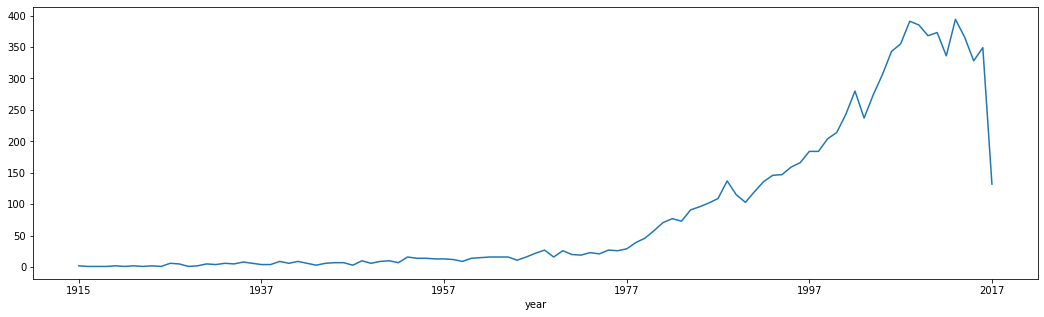

In [178]:
plt.figure(figsize=(18,5))
clean_df.groupby('year')['title_tmdb'].count().plot()

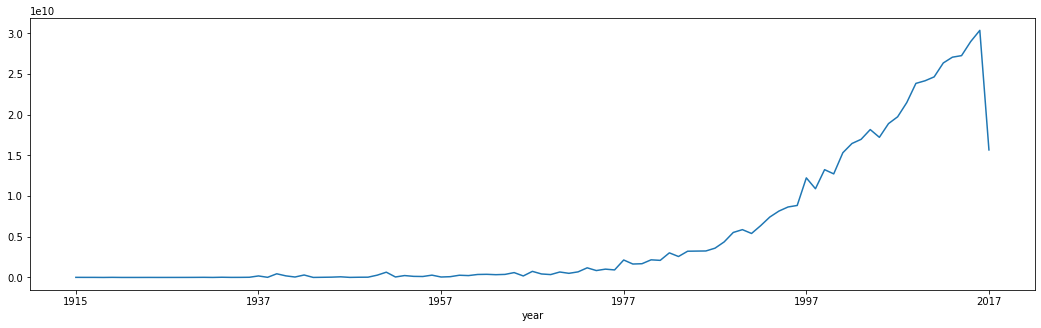

In [179]:
plt.figure(figsize=(18,5))
clean_df.groupby('year')['revenue'].sum().plot()

We notice that there is a sharp rise in the number of movies as well as revenue **starting the 1990s decade**. 
Meanwhile, we also see a dramatic decrease around the year 2017. However, we will not look too much into this, as it is entirely possible that movies were oversampled for more recent years, but undersampled for years around 2017 in this dataset.

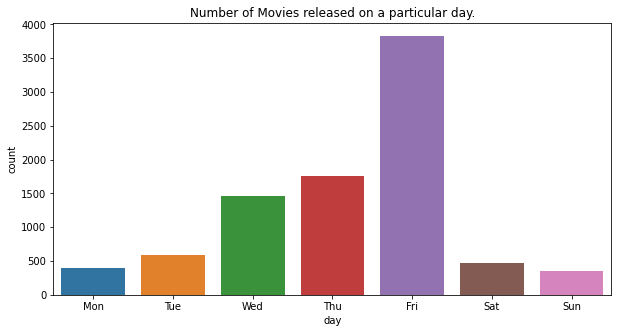

In [180]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=clean_df, order=day_order)

Since a large portion of movies are released on Friday, we convert the feature *day* into a binary feature *Is_Friday* to indicate if this film was released on a Friday.

In [181]:
clean_df['is_Friday'] = clean_df['day'].apply(lambda x: 1 if x=='Fri' else 0)

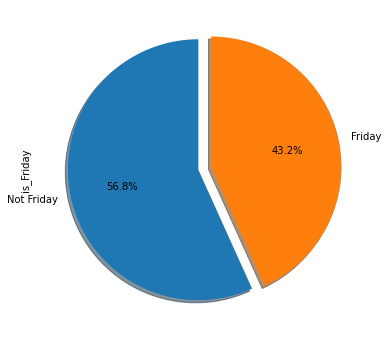

In [182]:
clean_df['is_Friday'].value_counts().plot(kind='pie',labels=['Not Friday','Friday'],startangle=90,shadow=True,
            figsize=(6,6),autopct="%1.1f%%", explode=(0,0.1))

Obviously, **Friday** is the most popular day for releasing movies. This is understandable, considering Friday is close to the weekend. Attributed to the same reason, **Sunday** and **Monday** are the least popular days.

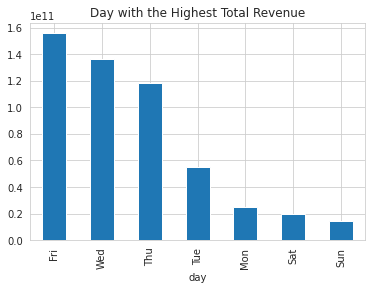

In [183]:
sns.set_style('whitegrid')
plt.title('Day with the Highest Total Revenue')
clean_df.groupby('day')['revenue'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

As we can expect, people are more inclined to go to cinemas more often on **Friday**, making it embracing the highest revenue.

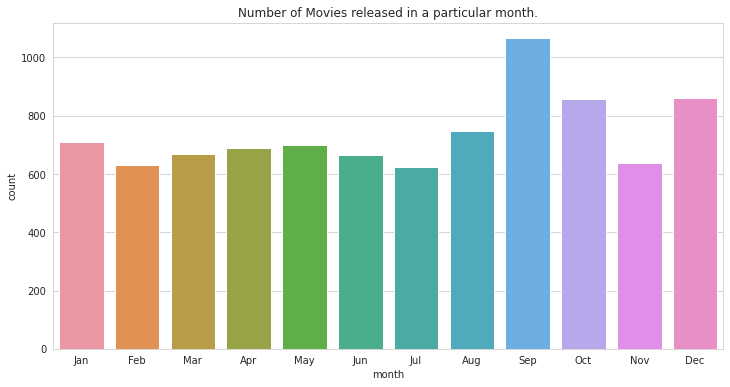

In [184]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=clean_df, order=month_order)

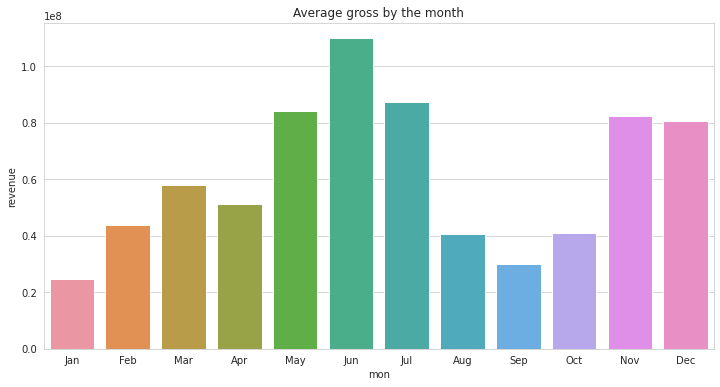

In [185]:
month_mean = pd.DataFrame(clean_df.groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average gross by the month")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)

It appears that September is the most popular month for releasing movies.  However, it is one of the least successful months throughout the whole year. It can be explained by the fact that September is the end of the summer holiday, and the starting of the new school semester.  As anticipated, June and July are the most successful months, and the audience is more likely to spend their disposable money on Entertainment. Also, blockbuster movies are usually released in this period.

##### **belongs_to_collection:**

Let us now have a brief look at Franchise movies:

In [186]:
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull() & df_fran['revenue']!=0]

In [187]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

Highest Grossing Movie Franchises:

In [188]:
fran_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
260,Harry Potter Collection,8,9.634209e+08,7.707367e+09
505,Star Wars Collection,8,9.293118e+08,7.434495e+09
303,James Bond Collection,26,2.733450e+08,7.106970e+09
575,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
413,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
692,Transformers Collection,5,8.732202e+08,4.366101e+09
166,Despicable Me Collection,4,9.227676e+08,3.691070e+09
667,The Twilight Collection,5,6.684215e+08,3.342107e+09
291,Ice Age Collection,5,6.433417e+08,3.216709e+09
313,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


The **Harry Potter** Franchise is the most successful movie franchise raking in more than 7.707 billion dollars from 8 movies. The **Star Wars** Movies come in a close second with a 7.403 billion dollars from 8 movies too. **James Bond** is third but the franchise has significantly more movies compared to the others in the list and therefore, a much smaller average gross.

**Most Successful Movie Franchises (by Average Gross):**

We will use the average gross per movie to gauge the success of a movie franchise. However, this is not a very potent metric as the revenues in this dataset have not been adjusted for inflation. Therefore, revenue statistics will tend to strongly favor franchises in the recent times.

In [189]:
fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
61,Avatar Collection,1,2.787965e+09,2.787965e+09
546,The Avengers Collection,2,1.462481e+09,2.924962e+09
232,Frozen Collection,1,1.274219e+09,1.274219e+09
219,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
591,The Hobbit Collection,3,9.785078e+08,2.935523e+09
615,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
260,Harry Potter Collection,8,9.634209e+08,7.707367e+09
505,Star Wars Collection,8,9.293118e+08,7.434495e+09
166,Despicable Me Collection,4,9.227676e+08,3.691070e+09
413,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


The Avatar Collection, although just consisting of one movie at the moment, is the most successful franchise of all time with the sole movie raking in close to 3 billion dollars. The Harry Potter franchise is still the most successful franchise with at least 5 movies.

**Longest Running Franchises:**

Finally, in this subsection, let us take a look at the franchises which have stood the test of time and have managed to deliver the largest number of movies under a single banner. This metric is potent in the way that it isn't affected by inflation. However, this does not imply that successful movie franchises tend to have more movies. Some franchises, such as Harry Potter, have a predefined storyline and it wouldn't make sense to produce more movies despite its enormous success.

In [190]:
fran_pivot.sort_values('count', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
303,James Bond Collection,26,2.733450e+08,7.106970e+09
228,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
419,Pokémon Collection,11,6.348189e+07,6.983008e+08
636,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
260,Harry Potter Collection,8,9.634209e+08,7.707367e+09
575,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
19,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
254,Halloween Collection,8,3.089601e+07,2.471681e+08
505,Star Wars Collection,8,9.293118e+08,7.434495e+09
462,Saw Collection,7,1.254725e+08,8.783078e+08


The James Bond Movies is the largest franchise ever with over 26 movies released under the banner. Friday the 13th and Pokemon come in at a distant second and third with 12 and 11 movies respectively.

0    7361
1    1495
Name: belongs_to_collection, dtype: int64

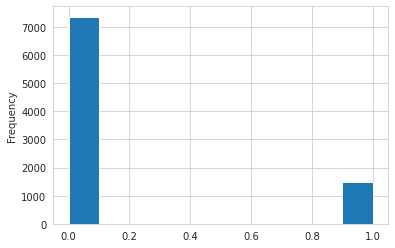

In [191]:
clean_df['belongs_to_collection'].plot.hist()
clean_df['belongs_to_collection'].value_counts()

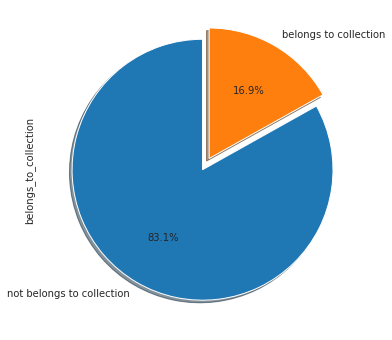

In [192]:
clean_df['belongs_to_collection'].value_counts().plot(kind='pie',labels=['not belongs to collection','belongs to collection'],startangle=90,shadow=True,
            figsize=(6,6),autopct="%1.1f%%", explode=(0,0.1))

##### **homepage:**

0    6346
1    2510
Name: homepage, dtype: int64

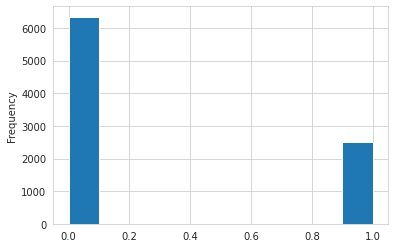

In [193]:
clean_df['homepage'].plot.hist()
clean_df['homepage'].value_counts()

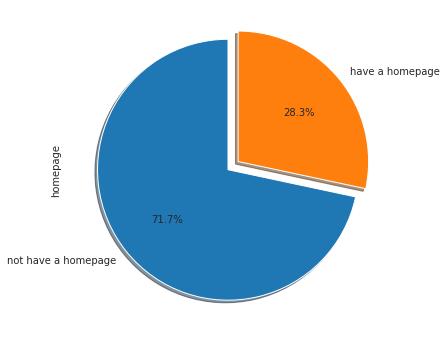

In [194]:
clean_df['homepage'].value_counts().plot(kind='pie',labels=['not have a homepage','have a homepage'],startangle=90,shadow=True,
            figsize=(6,6),autopct="%1.1f%%", explode=(0,0.1))

##### **budget and revenue:**

In [195]:
clean_df[['budget_tmdb','revenue']].describe()

,budget_tmdb,revenue
count,8.856000e+03,8.856000e+03
mean,2.325074e+07,5.926473e+07
std,3.392022e+07,1.359144e+08
min,1.000000e+00,1.000000e+00
25%,3.700000e+06,1.501280e+06
50%,1.100000e+07,1.237659e+07
75%,2.800000e+07,5.213014e+07
max,3.800000e+08,2.787965e+09


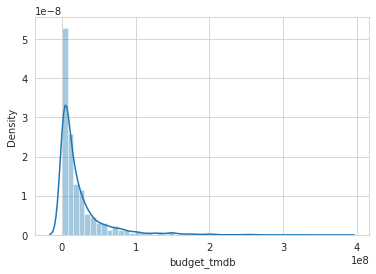

In [196]:
sns.distplot(clean_df['budget_tmdb'])

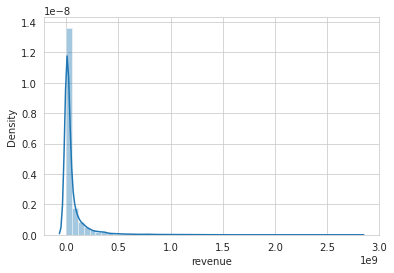

In [197]:
sns.distplot(clean_df['revenue'])

we have the revenue, the same situation of skewness of budget.

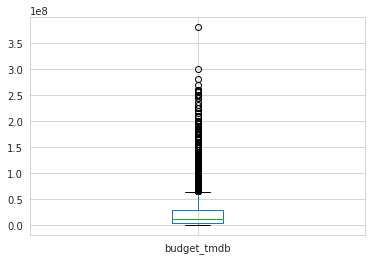

In [198]:
bud_box = clean_df.boxplot(['budget_tmdb'], showfliers=True)

We noticed that all the movies with more than 50 bilions are considered as outliers. On one hand because not all the film are 'Blockbuster'. On the other hand, there can be many outliers near to zero.

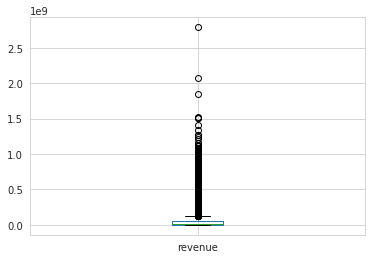

In [199]:
bud_box = clean_df.boxplot(['revenue'], showfliers=True)

In [200]:
clean_df[['title_tmdb', 'budget_tmdb', 'revenue', 'year']].sort_values('budget_tmdb', ascending=False).head(10)

,title_tmdb,budget_tmdb,revenue,year
5958,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2011
4678,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,2007
7365,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
4411,Superman Returns,270000000.0,3.910812e+08,2006
6254,John Carter,260000000.0,2.841391e+08,2012
8804,Transformers: The Last Knight,260000000.0,6.049421e+08,2017
5797,Tangled,260000000.0,5.917949e+08,2010
4662,Spider-Man 3,258000000.0,8.908716e+08,2007
6669,The Lone Ranger,255000000.0,8.928991e+07,2013
6814,The Hobbit: The Desolation of Smaug,250000000.0,9.584000e+08,2013


Two Pirates of the Carribean films occupy the top positions in this list with a budget of over 300 million dollars. Despite the fact that we are facing particularly expensive productions, The Lone Ranger earned only 35% of its investment, taking 90 million dollars on a 255 million dollar budget. A loss of 165.710.090 dollars that seems incredible among these blockbusters, to show once again that no data can be underestimated (actually treated as an outlier).

In [201]:
clean_df[['title_tmdb', 'budget_tmdb', 'year']].sort_values('budget_tmdb', ascending=False).tail(10)

,title_tmdb,budget_tmdb,year
1194,Slam,1.0,1998
1813,Modern Times,1.0,1936
6366,"Love, Wedding, Marriage",1.0,2011
5745,Tere Naam,1.0,2003
7994,The Letters,1.0,2015
2152,Less Than Zero,1.0,1987
501,East of Eden,1.0,1955
8025,Secret Society of Souptown,1.0,2015
8528,The Ugly Duckling,1.0,2010
1391,Lost & Found,1.0,1999


These is the number of movies under the 25 percentile of budget

In [202]:
clean_df['budget_tmdb'].quantile(q=0.25, interpolation='linear')

3700000.0

In [203]:
(clean_df['budget_tmdb']<=3.512454e+06).sum()

2197

but we focused on the 1 percentile

In [204]:
clean_df['budget_tmdb'].quantile(q=0.01, interpolation='linear'), clean_df['revenue'].quantile(q=0.01, interpolation='linear')

(402.2999999999997, 744.2)

In [205]:
(clean_df['budget_tmdb']<=402.3).sum(), (clean_df['revenue']<=744.2).sum()

(89, 89)

There are 89 movies that cost less than 342 dollars

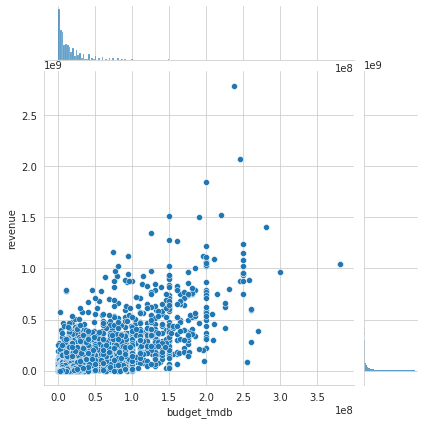

In [206]:
sns.jointplot(x='budget_tmdb',y='revenue',data=clean_df)

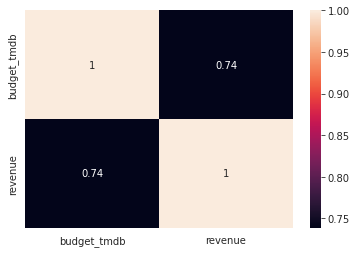

In [207]:
sns.heatmap(clean_df[['budget_tmdb','revenue']].corr(), annot = True)

From the figure above, we can see there exist a high correlation between budget and revenue. Therefore, we  defined another feature *return* as the ration of *revenue* to *budget*. This features is very insightful in the sense that It gives us an accurate picture of how financially successful a movie is. Particularly, we cannot say a movie that earned \$ 100 million with a \$ 50 million performed better than a movie which made  \$ 50 million, taking a budget in  \$ 10 million. 

In [208]:
clean_df['return'] = clean_df['revenue'] / clean_df['budget_tmdb']
clean_df[clean_df['return'].isnull()].shape

(0, 27)

In [209]:
clean_df['return'].describe()

count    8.856000e+03
mean     8.536456e+03
std      2.757399e+05
min      2.000000e-07
25%      2.956744e-01
50%      1.237990e+00
75%      3.143386e+00
max      1.492500e+07
Name: return, dtype: float64

In [210]:
clean_df['return_log'] = clean_df['return'].apply(math.log)

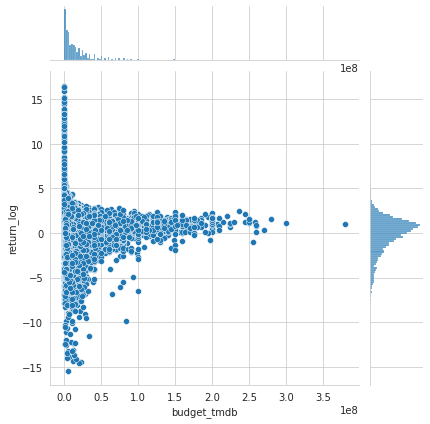

In [211]:
sns.jointplot(x='budget_tmdb',y= 'return_log',data=clean_df)

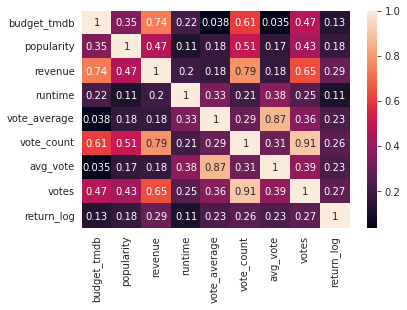

In [212]:
sns.heatmap(clean_df[['budget_tmdb','popularity','revenue','runtime','vote_average','vote_count','avg_vote','votes','return_log']].corr(), annot = True)

##### **popularity and runtime:**

In [213]:
clean_df['popularity'].describe()

count    8856.000000
mean        7.767887
std        11.376927
min         0.000001
25%         2.943790
50%         6.676155
75%        10.255789
max       547.488298
Name: popularity, dtype: float64

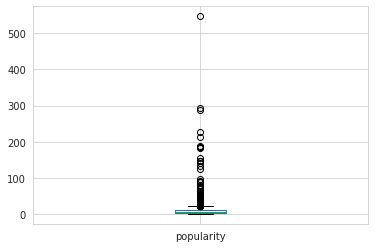

In [214]:
clean_df.boxplot(['popularity'], showfliers=True)

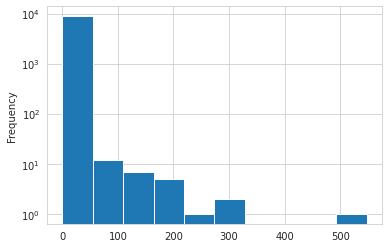

In [215]:
clean_df['popularity'].plot(logy=True, kind='hist')

Box plot and Log Popularity shows that there is a lot of difference between the mean (almost 8) and the maxium value of 547. So we will show the most popular movies and the least popular movies

In [216]:
clean_df[['title_tmdb', 'popularity','budget_tmdb', 'revenue', 'year']].sort_values('popularity', ascending=False).head(5)

,title_tmdb,popularity,budget_tmdb,revenue,year
7675,Minions,547.488298,74000000.0,1.156731e+09,2015
7871,Wonder Woman,294.337037,149000000.0,8.205804e+08,2017
8576,Beauty and the Beast,287.253654,160000000.0,1.262886e+09,2017
8704,Baby Driver,228.032744,34000000.0,2.245113e+08,2017
7159,Big Hero 6,213.849907,165000000.0,6.521054e+08,2014


In [217]:
clean_df[['title_tmdb', 'popularity','budget_tmdb', 'revenue', 'year']].sort_values('popularity', ascending=False).tail(5)

,title_tmdb,popularity,budget_tmdb,revenue,year
1061,Cheetah,0.011574,5000000.0,8153677.0,1989
2865,Grave of the Fireflies,0.010902,3700000.0,516962.0,1988
2159,Million Dollar Mystery,0.005351,10000000.0,989033.0,1987
4699,Swoon,0.003013,250000.0,340147.0,1992
7573,Falling From Grace,0.000001,3.0,232.0,1992


It is reasonable to expect that there are movies more famous than others. In this datset there are very expensive productions and films for less than 10000 dollars

In [218]:
clean_df['runtime'].describe()

count    8856.000000
mean      107.432475
std        20.415558
min        49.000000
25%        94.000000
50%       103.000000
75%       117.000000
max       422.000000
Name: runtime, dtype: float64

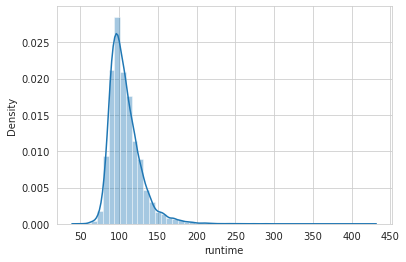

In [219]:
sns.distplot(clean_df['runtime'])

As we can expect the most frequent duration is 100 minutes.

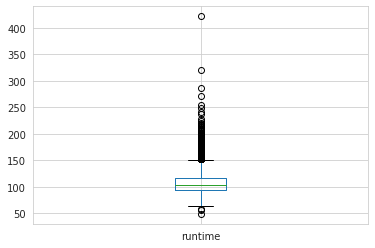

In [220]:
clean_df.boxplot(['runtime'], showfliers=True)

The Longest Movies:

In [221]:
clean_df[['runtime', 'title_tmdb', 'year']].sort_values('runtime',ascending=False).head(5)

,runtime,title_tmdb,year
3829,422.0,War and Peace,1966
6441,320.0,Gangs of Wasseypur,2012
682,287.0,Until the End of the World,1991
6024,272.0,Mysteries of Lisbon,2010
2120,254.0,Gettysburg,1993


The Shortest Movies:

In [222]:
clean_df[['runtime', 'title_tmdb', 'year']].sort_values('runtime',ascending=False).tail(5)

,runtime,title_tmdb,year
3804,63.0,The Unknown,1927
5159,63.0,5 Centimeters per Second,2007
3803,59.0,The Cheat,1915
8325,57.0,Lights of New York,1928
6889,49.0,Yu-Gi-Oh! 3D: Bonds Beyond Time,2010


Obviously, we can not consider movie out of the interquarile range as outlier because movies can have very different durations.

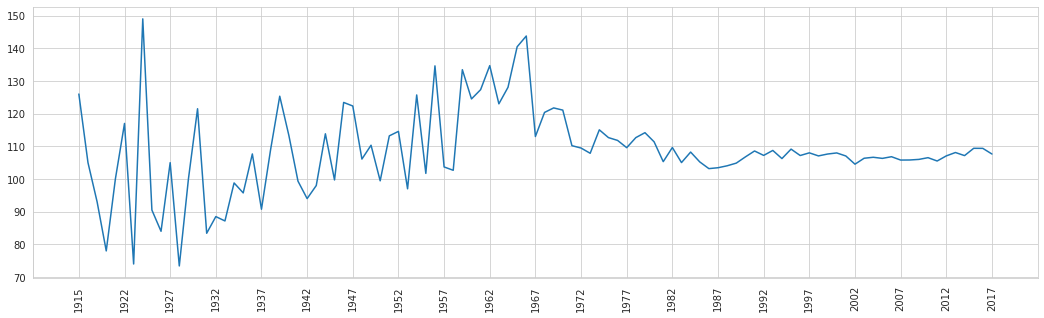

In [223]:
import matplotlib.ticker as plticker

#plt.figure(figsize=(18,5))
fig, ax = plt.subplots(figsize=(18,5))
year_runtime = clean_df.groupby('year')['runtime'].mean()
plt.plot(year_runtime.index, year_runtime)
plt.xticks(rotation='vertical')
#plt.show()
loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.show()

Since 1915 the films seem to have no fixed duration, but with an ascending trend starting from 1932 until it stabilized. Starting 1967, films started having 110 minutes duration and has remained more or less constant ever since.

##### **production_companies and production_countries:**

In [224]:
clean_df['production_companies'] = clean_df['production_companies'].apply(ast.literal_eval).values.tolist()
s = clean_df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [225]:
com_df = clean_df.drop('production_companies', axis=1).join(s)

In [226]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

Highest Earning Production Companies :

In [227]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
Universal Pictures,5.666042e+10,1.124215e+08,504
Warner Bros.,5.224246e+10,1.102162e+08,474
Paramount Pictures,5.010671e+10,1.111014e+08,451
Twentieth Century Fox Film Corporation,4.767337e+10,1.313316e+08,363
Walt Disney Pictures,4.170095e+10,2.622701e+08,159
Columbia Pictures,3.418626e+10,1.195324e+08,286
New Line Cinema,2.278181e+10,1.030851e+08,221
Amblin Entertainment,1.629705e+10,2.546414e+08,64
DreamWorks SKG,1.601241e+10,1.759606e+08,91
Village Roadshow Pictures,1.524850e+10,1.509752e+08,101


Most Succesful Production Companies

In [228]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
Marvel Studios,1.167954e+10,7.786357e+08,15
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Lucasfilm,9.904470e+09,4.502032e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
Jerry Bruckheimer Films,9.134308e+09,3.513195e+08,26
Legendary Pictures,1.328340e+10,3.406001e+08,39
1492 Pictures,5.657217e+09,3.142898e+08,18
Ingenious Film Partners,8.114513e+09,3.005375e+08,27
Atlas Entertainment,4.795004e+09,2.820591e+08,17
DC Comics,4.759076e+09,2.799456e+08,17


In [229]:
clean_df['production_countries'] = clean_df['production_countries'].apply(ast.literal_eval).values.tolist()
s = clean_df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [230]:
con_df = clean_df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(5)

,num_movies,country
0,6361,United States of America
1,964,United Kingdom
2,689,France
3,528,Germany
4,401,Canada


##### **genres:**

In order to investigate on different genres we created a new dataset of genres to show the occurences of each one.

In [231]:
# Inorder to count genre
clean_df['genres'] = clean_df['genres'].apply(ast.literal_eval).values.tolist()
s = clean_df.apply(lambda x: pd.Series(x['genres']).astype(str),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre_list'

In [232]:
gen_df = clean_df.drop('genres', axis=1).join(s)

In [233]:
genres_train = gen_df['genre_list'].drop_duplicates()

In [234]:
for genre in genres_train:
  print(genre)

Animation
Comedy
Family
Adventure
Fantasy
Romance
Drama
Action
Crime
Thriller
Horror
History
Science Fiction
Mystery
Music
Foreign
Western
War
Documentary
Musical
TV Movie
Biography
Sport


In [235]:
pop_gen = pd.DataFrame(gen_df['genre_list'].value_counts()).reset_index()
pop_gen.columns = ['genre_list', 'movies']
pop_gen.head(10)

,genre_list,movies
0,Drama,4522
1,Comedy,3136
2,Action,2061
3,Thriller,1902
4,Romance,1501
5,Adventure,1217
6,Crime,1210
7,Horror,935
8,Science Fiction,654
9,Family,607


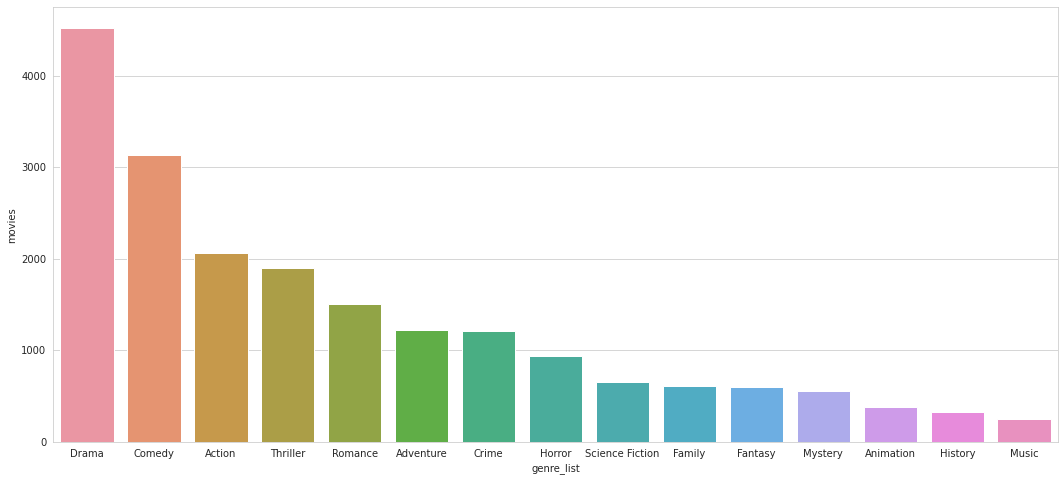

In [236]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre_list', y='movies', data=pop_gen.head(15))
plt.show()

**Drama** is the most commonly occurring genre with almost half the movies identifying itself as a drama film. **Comedy** comes in at a distant second with 25% of the movies having adequate doses of humor. Other major genres represented in the top 10 are Action, Thriller, Romance, Adventure and Crime.

In [237]:
top_genres = ['Drama', 'Comedy', 'Action',  'Thriller','Romance','Adventure', 'Crime','Horror', 'Science Fiction', 'Fantasy']
top_movies = gen_df[(gen_df['genre_list'].isin(top_genres))]

Then we focused on popularity based on these top genres

<Figure size 1296x576 with 0 Axes>

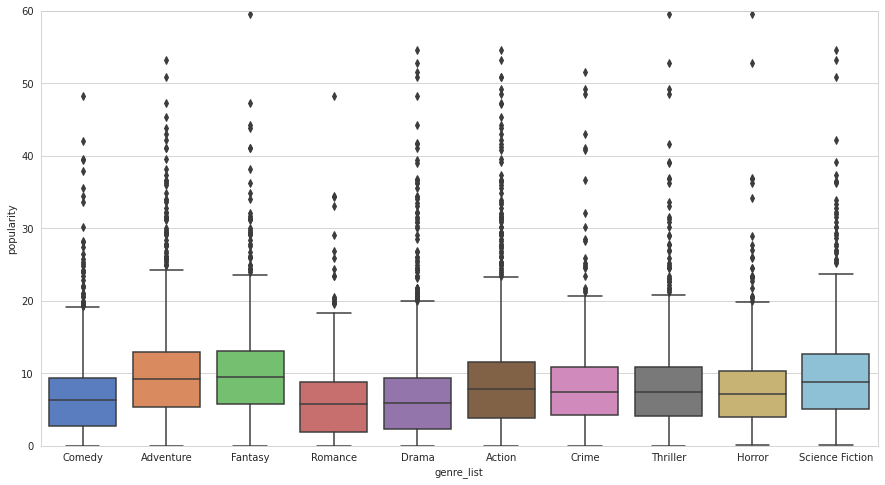

In [238]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre_list', y='popularity', data=top_movies, palette="muted", ax =ax)
ax.set_ylim([0, 60]) #not considering too high values (like 300)
plt.show()

We noted that although **drama** and **comedy** are the most frequent movies, they do not have the same popularity as genres like **fantasy** or **adventure**. All this reasoning is done in the average, not considering possibly films with very high poplarity values.

In [239]:
pop_avg=pop_gen #create a df of genre popularity avg
pop_avg['popularity_avg']=[0]*23
pop_avg.index = pop_avg["genre_list"]

In [240]:
for _, row in gen_df.iterrows():
    pop_avg['popularity_avg'].loc[row['genre_list']]+=row['popularity'] #store total popularity per genre

In [241]:
pop_gen.head()

,genre_list,movies,popularity_avg
genre_list,,,
Drama,Drama,4522,30489.516707
Comedy,Comedy,3136,21147.708423
Action,Action,2061,19939.166882
Thriller,Thriller,1902,16194.181312
Romance,Romance,1501,9482.792659


In [242]:
pop_gen['popularity_avg']=pop_gen['popularity_avg']/pop_gen['movies']

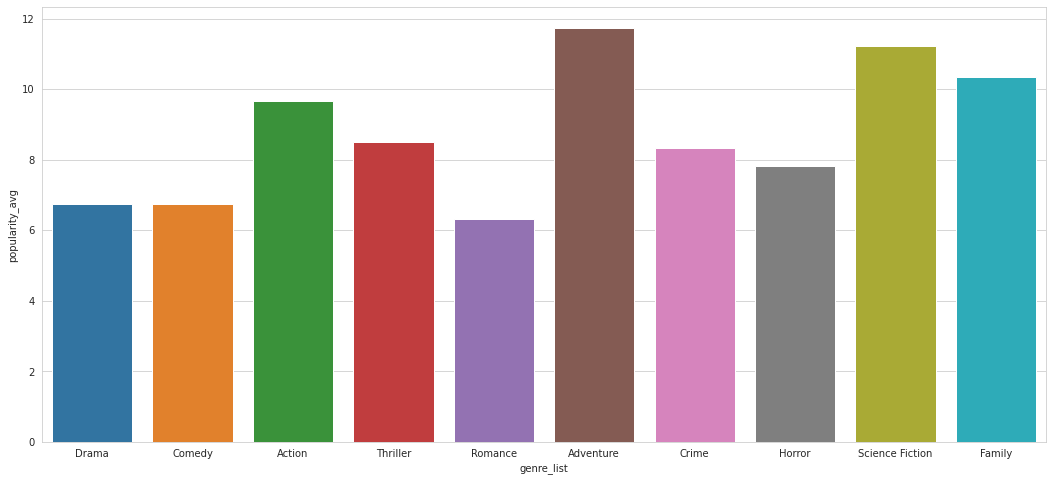

In [243]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre_list', y='popularity_avg', data=pop_gen.head(10))
plt.show()

Even using all the movies, the popularity of the films in the minority seems higher than those in the majority. To testify, probably, the greatest number of people who loved certain genres. Maybe adventure movies have a larger fan base than drama or comedy.

##### **spoken_language:**

In [244]:
clean_df['spoken_languages'] = clean_df['spoken_languages'].apply(ast.literal_eval).values.tolist()

In [245]:
clean_df['spoken_languages']

0                 [English]
1       [English, Français]
2                 [English]
3                 [English]
4                 [English]
               ...         
8851              [Pусский]
8852              [Pусский]
8853              [Pусский]
8854              [Pусский]
8855              [Pусский]
Name: spoken_languages, Length: 8856, dtype: object

In [246]:
clean_df['N_spoken_languages'] = clean_df['spoken_languages'].apply(lambda x: len(x))

1    6392
2    1538
3     576
4     224
5      84
6      30
7       7
9       3
8       2
Name: N_spoken_languages, dtype: int64

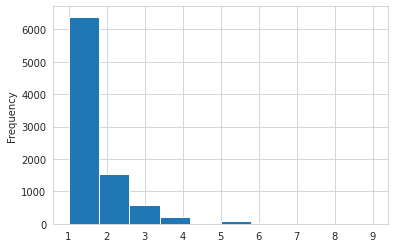

In [247]:
clean_df['N_spoken_languages'].plot.hist()
clean_df['N_spoken_languages'].value_counts()

Most movies speak only one language in the whole duration. 9 is the highest number of language spoken in a movie. 

Let's explore if movies with higher numbers of spoken language would somehow induce a higher return.

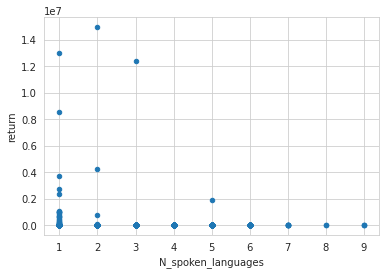

In [248]:
clean_df.plot.scatter(x='N_spoken_languages', y='return')

The scatter plot indicates there exists no evident corelation between the number of spoken languages and return. On one hand, many high return movies speaks only one languag. On the other hand, a movie speaking more than 3 languages is more likely to fail.

##### **vote_count and votes:**
In this section, we will work with metrics provided to us by TMDB users and IMDB users. We will try to gain a deeper understanding of the vote average and vote count features and try and deduce any relationships between them as well as other numeric features such as budget and revenue.

count     8856.000000
mean       477.426378
std       1029.802869
min          1.000000
25%         26.000000
50%        110.000000
75%        424.250000
max      14075.000000
Name: vote_count, dtype: float64

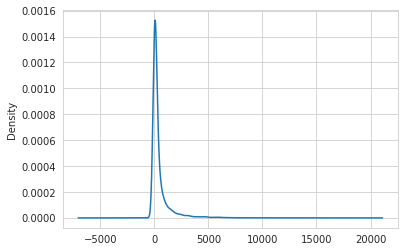

In [249]:
clean_df['vote_count'].plot.kde()
clean_df['vote_count'].describe()

count    8.856000e+03
mean     7.264969e+04
std      1.482251e+05
min      1.000000e+02
25%      5.012500e+03
50%      2.069850e+04
75%      7.354650e+04
max      2.278845e+06
Name: votes, dtype: float64

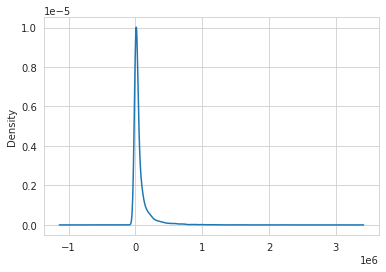

In [250]:
clean_df['votes'].plot.kde()
clean_df['votes'].describe()

Both distribution are extremely skewed. The median vote count from TMDB stands at only 110 votes. The most votes movie has got stands at 14,075. While the median vote count from IMDB has 20,698 votes, with maximum values reaching as high as 2.3 million. 
Theforefore, TMDB Votes are not as potent and suggestive as its IMDB counterpart. Nevertheless, let us check which the most voted on both websites.

**Most voted movies by TMDB and IMDB**

Text(0.5, 1.0, 'Most voted Movies on TMDB')

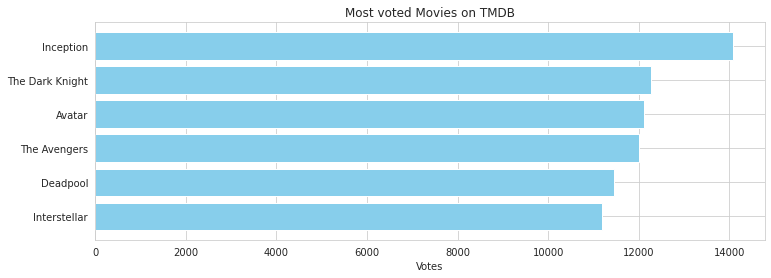

In [251]:
plt.figure(figsize=(12,4))
plt.barh(clean_df.sort_values('vote_count', ascending=False)['title_tmdb'].head(6), 
         clean_df.sort_values('vote_count', ascending=False)['vote_count'].head(6), 
         align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Votes")
plt.title("Most voted Movies on TMDB")

**Inception**, **The Dark Knight** gain the most voted on TMDB.

Text(0.5, 1.0, 'Most voted Movies on IMDB')

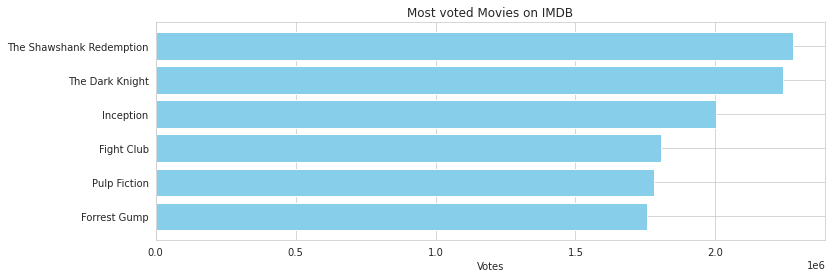

In [252]:
plt.figure(figsize=(12,4))
plt.barh(clean_df.sort_values('votes', ascending=False)['title_tmdb'].head(6),
         clean_df.sort_values('votes', ascending=False)['votes'].head(6), 
         align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Votes")
plt.title("Most voted Movies on IMDB")

**The Shawshank Redemption**, **The Dark Knight**, **Inception** figure at the top of our chart. Unsurprisingly, IMDB and IMDB share some popular movies in common, e.g., **The Dark Knight**, **Inception**. Strange enough, **The Shawshank Redemption** falls out of the top 6 voted movies on TMDB.

##### **vote_average and avg_vote:**

count    8856.000000
mean        6.130431
std         0.966414
min         1.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

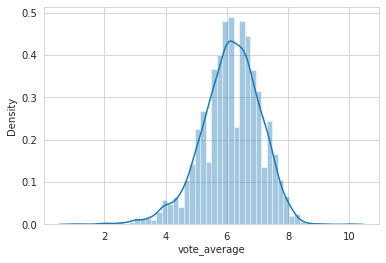

In [253]:
sns.distplot(clean_df['vote_average'])
clean_df['vote_average'].describe()

Users on TMDB are very strict with their rating. The mean rating is only a **6.1** on a scale of 10. Half of the movies have a rating lower than **6.2**.

**Hightest voted movies**

We only take into consideration of movies which have more than 5000 votes.

In [254]:
clean_df[clean_df['vote_count']>5000][['title_tmdb', 'vote_average','vote_count', 'avg_vote','year']].sort_values('vote_average', ascending=False).head(10)

,title_tmdb,vote_average,vote_count,avg_vote,year
190,The Shawshank Redemption,8.5,8358.0,9.3,1994
450,The Godfather,8.5,6024.0,9.2,1972
180,Pulp Fiction,8.3,8670.0,8.9,1994
4930,The Dark Knight,8.3,12269.0,9.0,2008
1582,Fight Club,8.3,9678.0,8.8,1999
6214,The Intouchables,8.2,5410.0,8.5,2011
214,Forrest Gump,8.2,8147.0,8.8,1994
603,The Empire Strikes Back,8.2,5998.0,8.7,1980
159,Star Wars,8.1,6778.0,8.6,1977
36,Se7en,8.1,5915.0,8.6,1995


 **The Shawshank Redemption** and **The Godfather** are voted as the highest movies. Interstingly, they also have a very high rating in IMDB (over 9).

count    8856.000000
mean        6.347572
std         1.039608
min         1.100000
25%         5.700000
50%         6.400000
75%         7.100000
max         9.300000
Name: avg_vote, dtype: float64

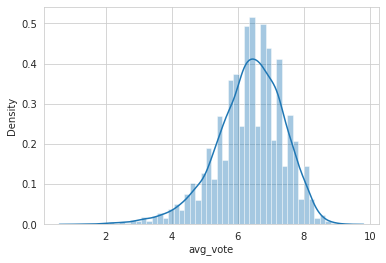

In [255]:
sns.distplot(clean_df['avg_vote'])
clean_df['avg_vote'].describe()

Users on IMDB are very similar in their ratings to users on TMDB. The mean rating is a **6.3** on a scale of 10,  a little bit higher than the mean rating on TMDB. 

**Highest voted movies**

Similar to the previous case, we only select movies carrying more than 5000 votes.

In [256]:
clean_df[clean_df['vote_count']>5000][['title_tmdb', 'avg_vote','votes', 'vote_average','year']].sort_values('avg_vote', ascending=False).head(10)

,title_tmdb,avg_vote,votes,vote_average,year
190,The Shawshank Redemption,9.3,2278845.0,8.5,1994
450,The Godfather,9.2,1572674.0,8.5,1972
4930,The Dark Knight,9.0,2241615.0,8.3,2008
180,Pulp Fiction,8.9,1780147.0,8.3,1994
3409,The Lord of the Rings: The Return of the King,8.9,1604280.0,8.1,2003
1582,Fight Club,8.8,1807440.0,8.3,1999
5674,Inception,8.8,2002816.0,8.1,2010
214,Forrest Gump,8.8,1755490.0,8.2,1994
2576,The Lord of the Rings: The Fellowship of the Ring,8.8,1619920.0,8.0,2001
603,The Empire Strikes Back,8.7,1132073.0,8.2,1980


 Interstingly, **The Shawshank Redemption** and **The Godfather** are also voted as the highest movies on IMDB. 

Study correlations between votes on TMDB/IMDB(vote_average/avg_vote) and other features.

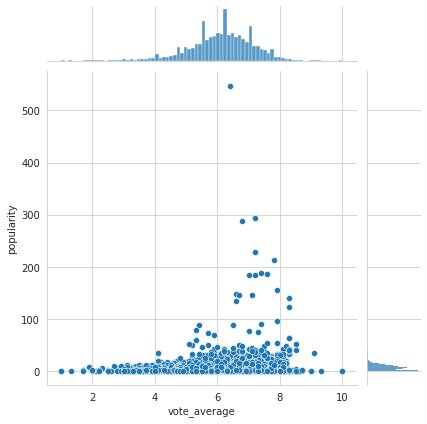

In [257]:
sns.jointplot(x='vote_average', y='popularity', data=clean_df)

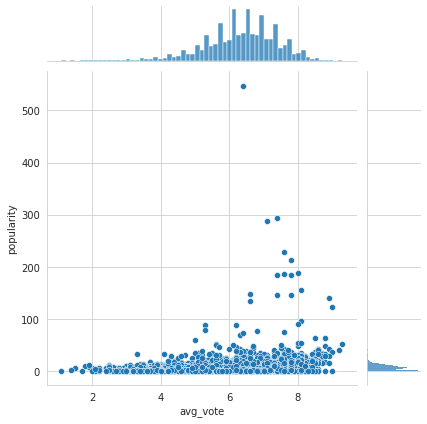

In [258]:
sns.jointplot(x='avg_vote', y='popularity', data=clean_df)

Popularity and vote do not enjoy a tangible correlation. That is to say, a high voted movie does not necessarily imply it is popular.

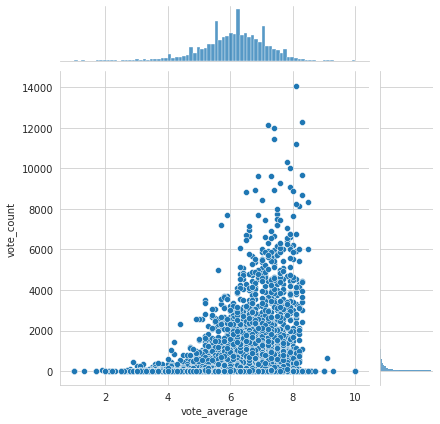

In [259]:
sns.jointplot(x='vote_average', y='vote_count', data=clean_df)

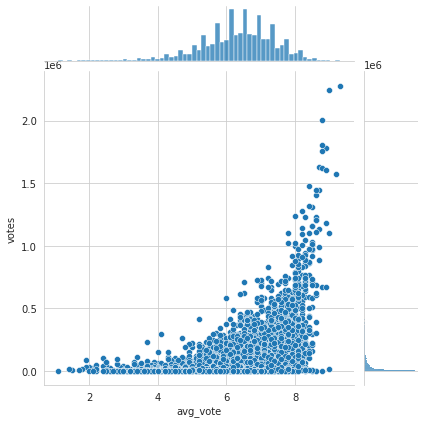

In [260]:
sns.jointplot(x='avg_vote', y='votes', data=clean_df)

There is no strong correlation between the number of votes and ratings. Thus a more significant number of votes on a particular movie does not necessarily mean the movie is good.

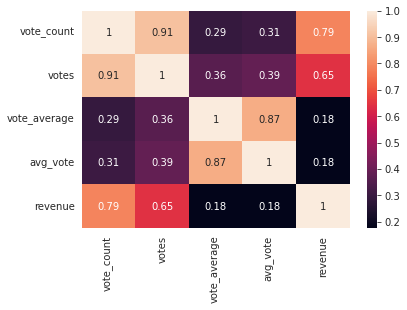

In [261]:
sns.heatmap(clean_df[['vote_count','votes','vote_average','avg_vote','revenue']].corr(), annot = True)

As we can see, there are visible correlations between the number of votes on TMDB and IMDB, as well as between ratings on TMDB and IMDB. In other words, users on TMDB and IMDB have similar tastes in movies, or users who vote on TMDB go to vote on IMDB too. 

As expected, more votes on a movie suggest that more people watched this movie, bringing about higher revenue.  
Quite the opposite, a high rating does not guarantee a good revenue.

##### **actors, director and writer:**

Actors with the Highest Total Revenue

In [262]:
clean_df['actors_tmdb'] = clean_df['actors_tmdb'].apply(ast.literal_eval).values.tolist()
s = clean_df['actors_tmdb'].apply(pd.Series).stack().reset_index(level=1, drop=True)
s.name = 'actor'
actor_df = clean_df.drop('actors_tmdb', axis=1).join(s)

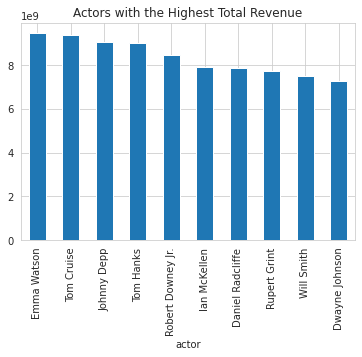

In [263]:
sns.set_style('whitegrid')
plt.title('Actors with the Highest Total Revenue')
actor_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

Emma Watson, Tom Cruise, and Johnny Depp take the top 3 places who earn the most total revenue.

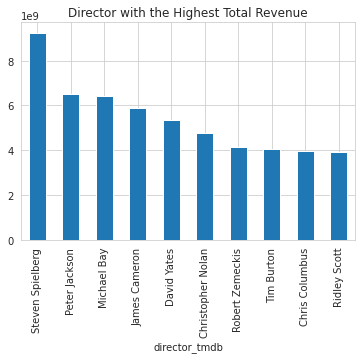

In [264]:
sns.set_style('whitegrid')
plt.title('Director with the Highest Total Revenue')
clean_df.groupby('director_tmdb')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

Steven Spielberg earns the most revenue, far ahead of the other directors.

In [265]:
clean_df['writer'] = clean_df['writer'].apply(ast.literal_eval).values.tolist()
s = clean_df['writer'].apply(pd.Series).stack().reset_index(level=1, drop=True)
s.name = 'writers'
writer_df = clean_df.drop('writer', axis=1).join(s)

In [266]:
writer_df['writers'].value_counts()

Woody Allen            41
Stephen King           34
Luc Besson             32
John Hughes            25
David Koepp            21
                       ..
Stuart Townsend         1
Daniele Ciprì           1
Jay Wolpert             1
Mitch Markowitz         1
Ernest R. Dickerson     1
Name: writers, Length: 8560, dtype: int64

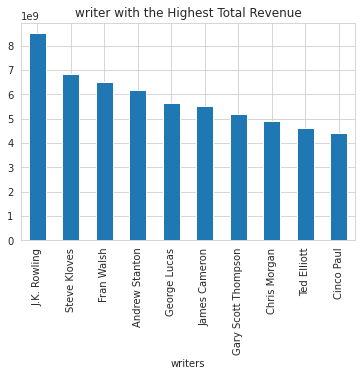

In [267]:
sns.set_style('whitegrid')
plt.title('writer with the Highest Total Revenue')
writer_df.groupby('writers')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

J.K. Rowling occupies the first position among all the writers. Besides, James Cameron is very successful both as a director and as a writer.

##### **original_language:** 


In [268]:
clean_df['original_language'].drop_duplicates().shape[0]

54

In [269]:
lang_df = pd.DataFrame(clean_df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,7422,en
fr,229,fr
ru,159,ru
hi,141,hi
es,121,es


There are over 54 languages represented in our dataset. As we had expected, English language films form the overwhelmingly majority. French and Russian movies come at a very distant second and third respectively. Let us represent the most popular languages (apart from English) in the form of a bar plot.

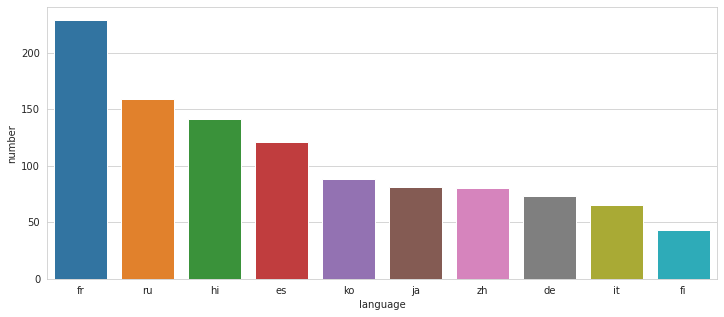

In [270]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

As mentioned earlier, **French** and **Russian** are the most commonly occurring languages after **English**. 

original_language will be replaced by a feature called **is_English** to denote if a particular film is in English or another Language.

In [271]:
clean_df['is_english'] = clean_df['original_language'].apply(lambda x: 1 if x=='en' else 0)
clean_df = clean_df.drop('original_language', axis=1)

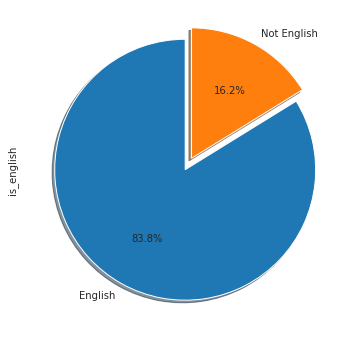

In [272]:
clean_df['is_english'].value_counts().plot(kind='pie',labels=['English','Not English'],startangle=90,shadow=True,
            figsize=(6,6),autopct="%1.1f%%", explode=(0,0.1))

The vast majority of movies are shot in English, over 80 percent.

##### **overiew, tagline, title and keywords:**

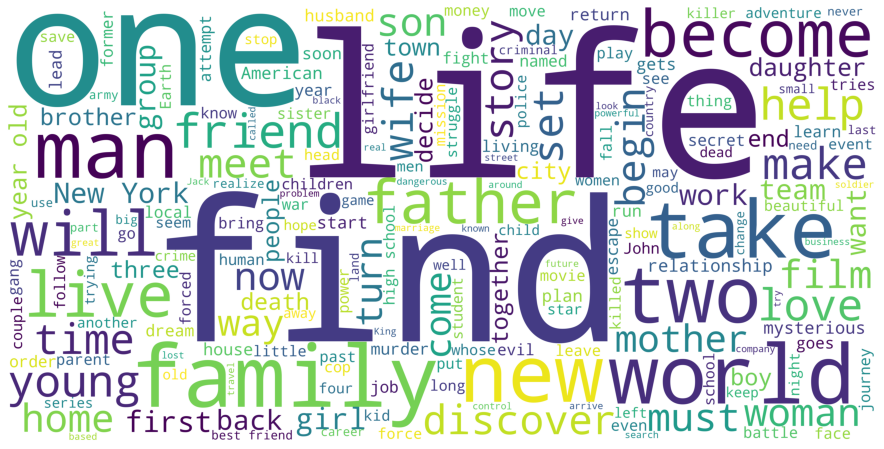

In [273]:
plt.figure(figsize=(16,8))
plt.imshow(WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, 
                     width=4000).generate(' '.join(clean_df['overview'])))
plt.axis('off')
plt.show()

**Life** is the most commonly used word in the Description. **One** and **Find** are also popular , together with **Love**, **Man** and **Girl**, these wordclouds give us a pretty good idea of the most popular themes present in movies.

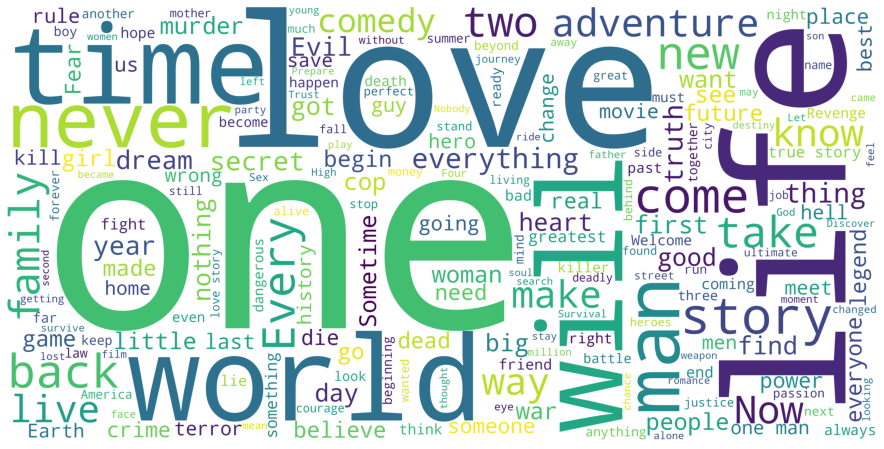

In [274]:
plt.figure(figsize=(16,8))
plt.imshow(WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, 
                     width=4000).generate(' '.join(clean_df['tagline'])))
plt.axis('off')
plt.show()

Taglines are the movies' adversing slogan, which gives quick and catchy insight into the themes. **One** and **Love** are the most commonly used word in Movie's taglines.
Together with **life**, **world** and **time**, these wordclouds give us a pretty good idea of the most popular subject present in movies.

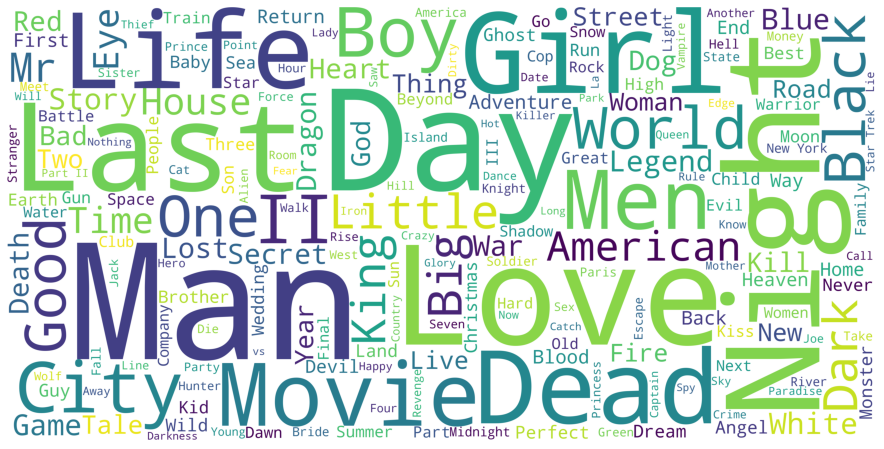

In [275]:
plt.figure(figsize=(16,8))
plt.imshow(WordCloud(stopwords=STOPWORDS, background_color='white', 
                     height=2000, width=4000).generate(' '.join(clean_df['title_tmdb'])))
plt.axis('off')
plt.show()

**Man**, **Girl**, **Love** are the most commonly used word in Movie titles. **day** and **Night** are also hot words in Movie Blurbs. These would cloud encapsulates the idea of ubiquitious presence of romance movies.

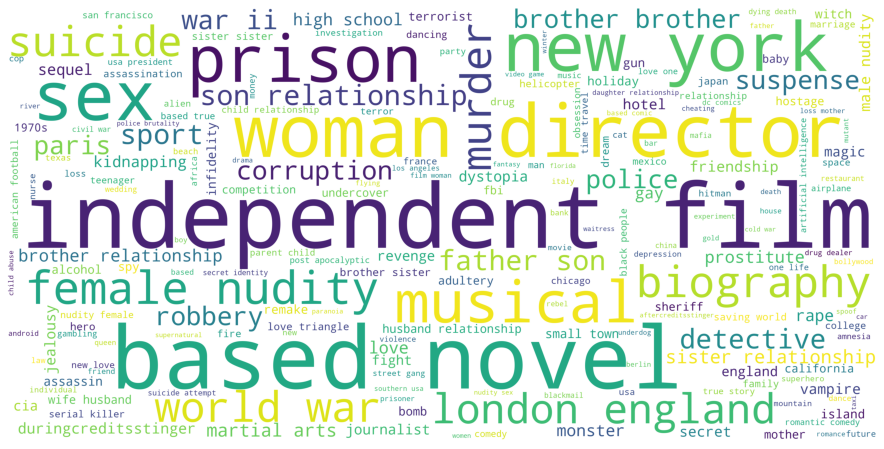

In [276]:
clean_df['keywords'] = clean_df['keywords'].apply(ast.literal_eval).values.tolist()
plt.figure(figsize=(16,8))
plt.imshow(WordCloud(stopwords=STOPWORDS, 
                     background_color='white', 
                     height=2000, 
                     width=4000).generate(' '.join(clean_df['keywords'].apply(lambda x: ','.join(map(str, x))))))
plt.axis('off')
plt.show()

**Independent**, **film**, **woman**, **director**, **based**, **novel**, **prison**, **sex** are the hottest themes in keywords, which means movies revolved around independence, women, prison win the favor of the market.

In [277]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8856 entries, 0 to 8855
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  8856 non-null   int64  
 1   budget_tmdb            8856 non-null   float64
 2   genres                 8856 non-null   object 
 3   homepage               8856 non-null   int64  
 4   overview               8856 non-null   object 
 5   popularity             8856 non-null   float64
 6   production_companies   8856 non-null   object 
 7   production_countries   8856 non-null   object 
 8   revenue                8856 non-null   float64
 9   runtime                8856 non-null   float64
 10  spoken_languages       8856 non-null   object 
 11  tagline                8856 non-null   object 
 12  title_tmdb             8856 non-null   object 
 13  vote_average           8856 non-null   float64
 14  vote_count             8856 non-null   float64
 15  avg_

In [278]:
clean_df.to_csv('/content/drive/MyDrive/BDA/input/eda_df.csv', index=False)

<a id='mp'></a>
## 4. Motivation and Proposal ([to top](#top))

We all know how the economic return a producer can get from a film is important. The purpose of ​​our task is to be able to predict the economic return of a movie starting from its characteristics. The idea is to use a regressor, not only stopping us at a quantitative classification (accuracy), but also trying to find the variables that most influence the success of the movie through an explainer. As we are convinced that a prediction without an explanation remains unusable. Once the prediction has been realized, we would like to dedicate ourselves to the creation of a prototype of a recommendation system based on keywords and votes (perhaps adding datasets). Obviously not trying to compete with the Netflix one, which currently seems to be state of the art, but giving a first structure to a system that in a world like today's: so full of data, it becomes necessary not to leave the user alone in navigation and allows to increase the appeal of the site.

In [279]:
return_df = clean_df[['budget_tmdb', 'homepage', 'popularity', 'runtime',
                      'vote_average', 'vote_count', 'year', 'is_Friday',
                      'month', 'is_english','belongs_to_collection', 
                      'production_companies', 'writer', 'actors_tmdb',
                      'director_tmdb', 'genres','return_log']]

recommender_df = clean_df[['tagline', 'overview', 'genres', 'keywords',
                           'production_companies', 'title_tmdb',
                           'writer', 'actors_tmdb', 'director_tmdb']]

In [280]:
return_df.head(5).T

,0,1,2,3,4
budget_tmdb,3e+07,6.5e+07,2.5e+07,1.6e+07,3e+07
homepage,1,0,0,0,0
popularity,21.9469,17.0155,11.7129,3.85949,8.38752
runtime,81,104,101,127,106
vote_average,7.7,6.9,6.5,6.1,5.7
vote_count,5415,2413,92,34,173
year,1995,1995,1995,1995,1995
is_Friday,0,1,1,1,1
month,Oct,Dec,Dec,Dec,Feb
is_english,1,1,1,1,1


In [281]:
recommender_df.head(5).T

,0,1,2,3,4
tagline,,Roll the dice and unleash the excitement!,Still Yelling. Still Fighting. Still Ready for...,Friends are the people who let you be yourself...,Just When His World Is Back To Normal... He's ...
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
genres,"[Animation, Comedy, Family]","[Adventure, Fantasy, Family]","[Romance, Comedy]","[Comedy, Drama, Romance]",[Comedy]
keywords,"[jealousy, toy, boy]","[board game, disappearance, based on children'...","[fishing, best friend, duringcreditsstinger]","[based on novel, interracial relationship, sin...","[baby, midlife crisis, confidence]"
production_companies,[Pixar Animation Studios],"[TriStar Pictures, Teitler Film, Interscope Co...","[Warner Bros., Lancaster Gate]",[Twentieth Century Fox Film Corporation],"[Sandollar Productions, Touchstone Pictures]"
title_tmdb,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
writer,"[John Lasseter, Pete Docter]","[Jonathan Hensleigh, Greg Taylor]","[Mark Steven Johnson, Mark Steven Johnson]","[Terry McMillan, Terry McMillan]","[Albert Hackett, Frances Goodrich]"
actors_tmdb,"[Tom Hanks, Tim Allen, Don Rickles]","[Robin Williams, Jonathan Hyde, Kirsten Dunst]","[Walter Matthau, Jack Lemmon, Ann-Margret]","[Whitney Houston, Angela Bassett, Loretta Devine]","[Steve Martin, Diane Keaton, Martin Short]"
director_tmdb,John Lasseter,Joe Johnston,Howard Deutch,Forest Whitaker,Charles Shyer


## 5. Save the notebook([to top](#top))

In [282]:
!pip install jovian --upgrade --quiet
import jovian
# Execute this to save new versions of the notebook
jovian.commit(project="Movies-data-exploration")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lilanpei/movies-data-exploration


'https://jovian.ai/lilanpei/movies-data-exploration'